# EDA on dataset of Housing

## Dataset Description:

The house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.

| Column | Description |
| --- | --- | 
| **CRIM**    | per capita crime rate by town |
| **ZN**      | proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS**   | proportion of non-retail business acres per town |
| **CHAS**    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| **NOX**     | nitric oxides concentration (parts per 10 million) |
| **RM**      | average number of rooms per dwelling |
| **AGE**     | proportion of owner-occupied units built prior to 1940 |
| **DIS**     | weighted distances to five Boston employment centres |
| **RAD**     | index of accessibility to radial highways |
| **TAX**     | full-value property-tax rate per \$10,000 |
| **PTRATIO** |  pupil-teacher ratio by town |
| **B**       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| **LSTAT**   | \% lower status of the population |
| **MEDV**    | Median value of owner-occupied homes in \$1000's |

In [1]:
%%HTML
<style type="text/css">
table td, table th {
  border: 0.5px  black solid !important;
  color: black !important;
}
</style>

In [2]:
# importing required libraries in this project
import pandas as pd # this library is used for dealing with dataframes
import numpy as np  # this library is used for dealing with arrays and numerical values
import matplotlib.pyplot as plt # this library is used for visulization
import seaborn as sns # this library is also used visualization with some additional functions 
import missingno as msno#  # this library is used for visualising mssing values

In [3]:
# Setting the figure size for all the plots 
sns.set(rc={'figure.figsize':(15,10)})

## Load the dataset into pandas and get a peek at the underlying data in the dataframe.

In [4]:
# Reading dataset
house = pd.read_csv("housing.csv", 
                    names = ['CRIM', 'ZN', 'INDUS', 'CHAS' ,'NOX' , 'RM' ,'AGE' ,  #Setting the names of columns
                             'DIS', 'RAD','TAX' ,'PTRATIO' ,'B' ,'LSTAT' ,'MEDV' ],
                    delimiter=r"\s+") # Adding delimeter for spliting the data

## Dimensions of the dataframe

In [5]:
#Checking the dimension of the dataset using shape function
house.shape

(506, 14)

| Columns | Rows |
| --- |--- |  
| 14 | 506 |

In [6]:
# Analysing first 10 rows
house.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [7]:
# Analysing last 10 rows
house.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


## Information about the schema

In [8]:
# Getting information about all the columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Now,
-  **CHAS** is Charles River dummy variable
-  **RAD** is index of accessibility to radial highways

So from this description we are getting that **CHAS** and **RAD** are categorical data, but as the python is reading it as as float and int we hacve to convert it into **Categorical** type of data

In [9]:
# Converting to the categorical data type
category = ['CHAS', 'RAD']
for i in category:
    house[i] = house[i].astype('category') #astype() function is used to change the data type of the variable

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


Now, as we can see **CHAS** and **RAD** are converted in to the **Category**.

## Statistical metrics of each column

In [11]:
#Analysing the statistical metrics for numerical columns
house.describe() #describe function is used to get the statistical metrics

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
#Analysing the statistical metrics for categorical columns
house.describe(include='category')

,CHAS,RAD
count,506,506
unique,2,9
top,0,24
freq,471,132


## Missing values

In [13]:
#Cheching the null values in the detaset
house.isnull().sum() # isnull() is used to check null values ion the dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

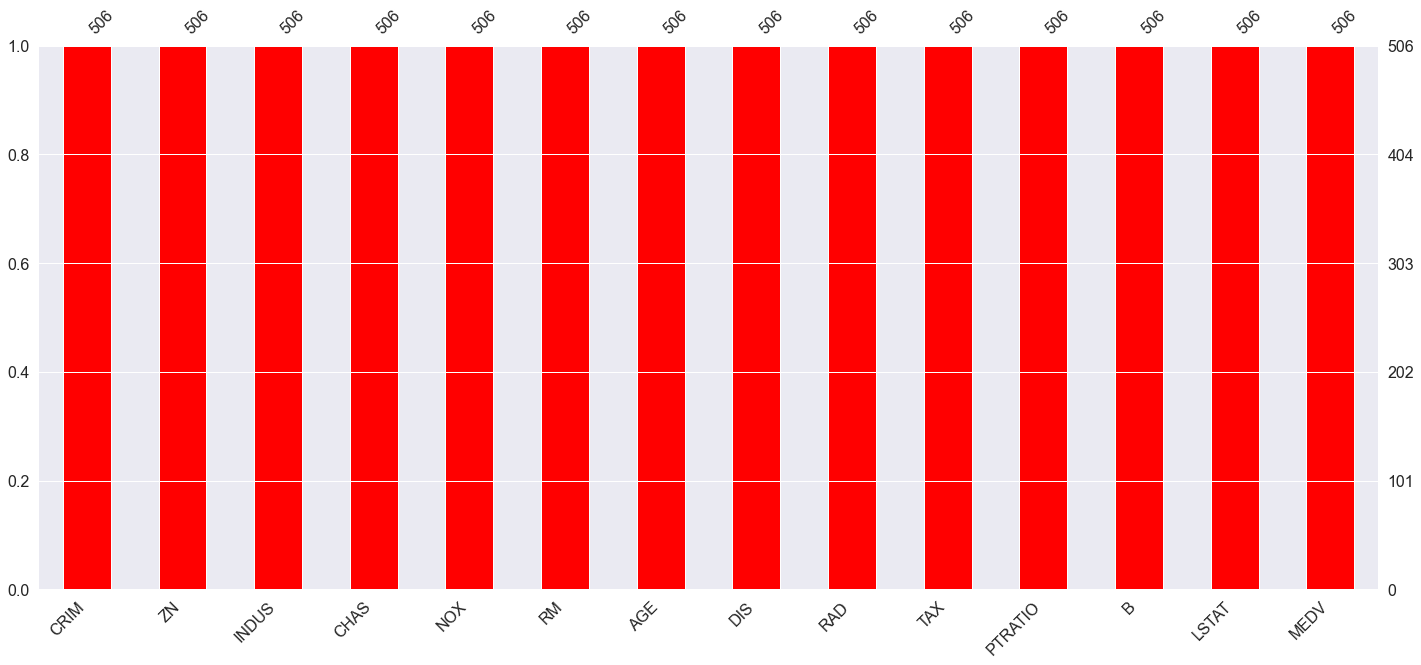

In [14]:
#Using missingo library for analysing missing value with visualzation 
msno.bar(house, color='red')

**Conclusion** 

As we can see there are no null values, and also we can see in the graph that there are no missing values in our dataset. 

## Erroneous/wrong values

**Erroneous/wrong values** are the values wich was null but replaced by some special char like, **'.'  , ','  , '/'** and many other. If this type of data are available in the dataset then the python will read it as a object data type.

In [15]:
#Examining the datatypes of all the columns
house.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

**Conclusion**

As we can see none of the column is reading the data as object so it concludes that there are no Erroneous or the wrong values in our dataset.

## Skewed data

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. Skewness of the data can be measure by the skew() function.

**The rule of thumb for skewness seems to be:**

|   | Range | Type |
| --- | --- |--- |  
| 1 | -0.5 to 0.5 | Symetrical data |
| 2 |  -1 to -0.5 or 0.5 to 1 | Moderately skewed |
| 3 | less than -1 or greater than 1 | Highly skewed |

In [16]:
#Storing all the numeric data type column in variable named numeric
numeric = house.select_dtypes(include='number').columns

In [17]:
#Checking the skweness values for all the numerical columns
house[numeric].skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

<AxesSubplot:>

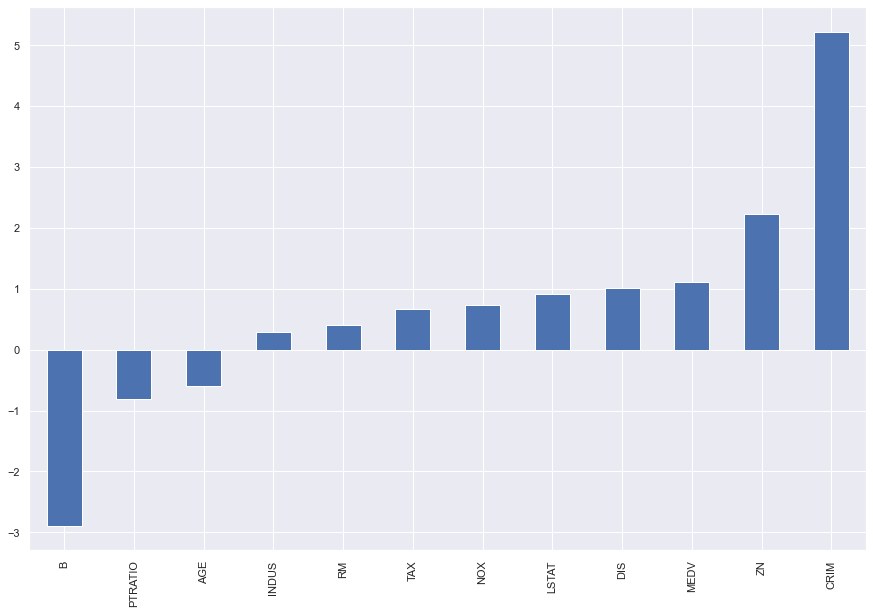

In [18]:
# Visualizing the skewnss of all the columns
house.skew(numeric_only=True).sort_values().plot(kind='bar')

**Conclusion**

The skewness of all the columns are as following,

| Column | Type of skewness |
| --- | --- | 
| **CRIM**    | Moderately skewed |
| **ZN**       | Highly skewed |
| **INDUS**   | Symetrical |
| **NOX**     | Moderately skewed |
| **RM**      | Symetrical |
| **AGE**     | Moderately skewed |
| **DIS**     | Moderately skewed |
| **TAX**     | Moderately skewed |
| **PTRATIO** | Moderately skewed |
| **B**       | Highly skewed |
| **LSTAT**   | Moderately skewed |
| **MEDV**    | Moderately skewed |


Now as we can see the max columns are skewd. If there are too much skewness in the data, then many statistical model don't work properly. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model's performance. 

So, for reducing the skewness **Transformation** is used. Transformation can be done by **Square root(sqrt) transformation, Cube root(cbrt) transformation, Log transformation, Boxcox transormation** and many others.

Now different different columns are performing good with different different transformation. But different transformation for all the columns are not good. So by performing and analysing various transformation we are reached to the conclusion that **Log Transformation** is performing good than others on maximum columns.  

In [19]:
# Making the copy of dataset to perform transformation
house1 = house.copy(deep=True)

Now, log transforming is not performing good with **AGE, PTRATIO** and **B**. So, we are not applying transformation on those columns as well as on the columns wich are already symetrical.

In [20]:
#Storing all the columns in the variable which are going to be transform  
log_trns = ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT', 'MEDV']

In [21]:
#Performing log transformation
for i in log_trns:
    house1[i] = np.log(house1[i])  #log() function of numpy is used for applying log transformation

In [22]:
#Checking the skewmess of transformed data
house1[numeric].skew()

CRIM       0.405934
ZN         2.225666
INDUS      0.295022
NOX        0.357780
RM        -0.294663
AGE       -0.598963
DIS        0.152730
TAX        0.330557
PTRATIO   -0.802325
B         -2.890374
LSTAT     -0.320232
MEDV      -0.330321
dtype: float64

<AxesSubplot:>

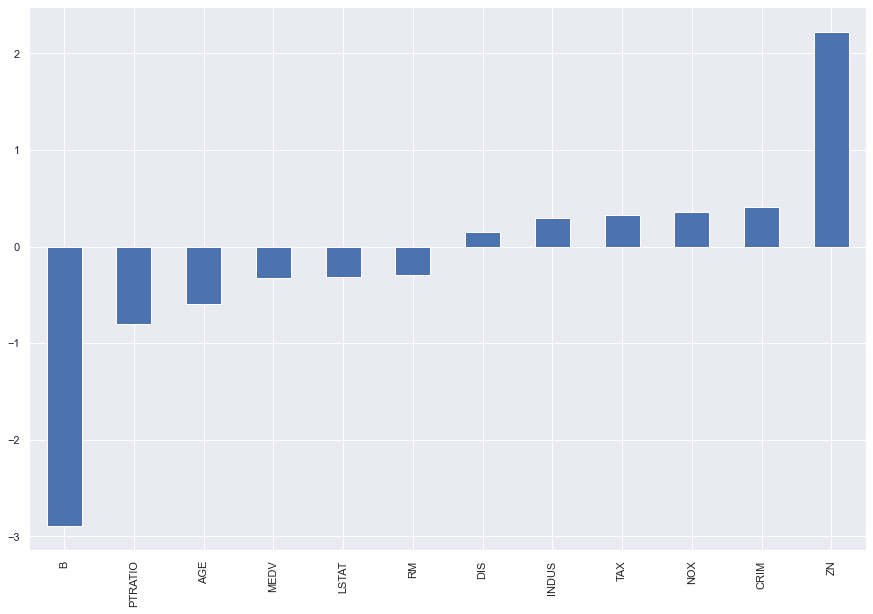

In [23]:
house1.skew(numeric_only=True).sort_values().plot(kind='bar')

**Conclusion**

The skewness of all the columns after transformation are as following,

| Column | Type of skewness |
| --- | --- | 
| **CRIM**    | Symetrical |
| **ZN**       | Highly skewed |
| **INDUS**   | Symetrical |
| **NOX**     | Symetrical |
| **RM**      | Symetrical |
| **AGE**     | Moderately skewed |
| **DIS**     | Symetrical |
| **TAX**     | Symetrical |
| **PTRATIO** | Moderately skewed |
| **B**       | Highly skewed |
| **LSTAT**   | Symetrical |
| **MEDV**    | Symetrical |

Now, as we can see that maximum columns are converted in to the **Symetrical skewd** wich we can also say **Normally Distributed**. This dataset will now decress the skewness as well as the outliers of our dataset.

## Examining Outliers

An **outlier** is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate **experimental error**; the latter are sometimes excluded from the data set. An outlier can cause **serious problems** in statistical analyses.

- **Outliers of untransformed data**

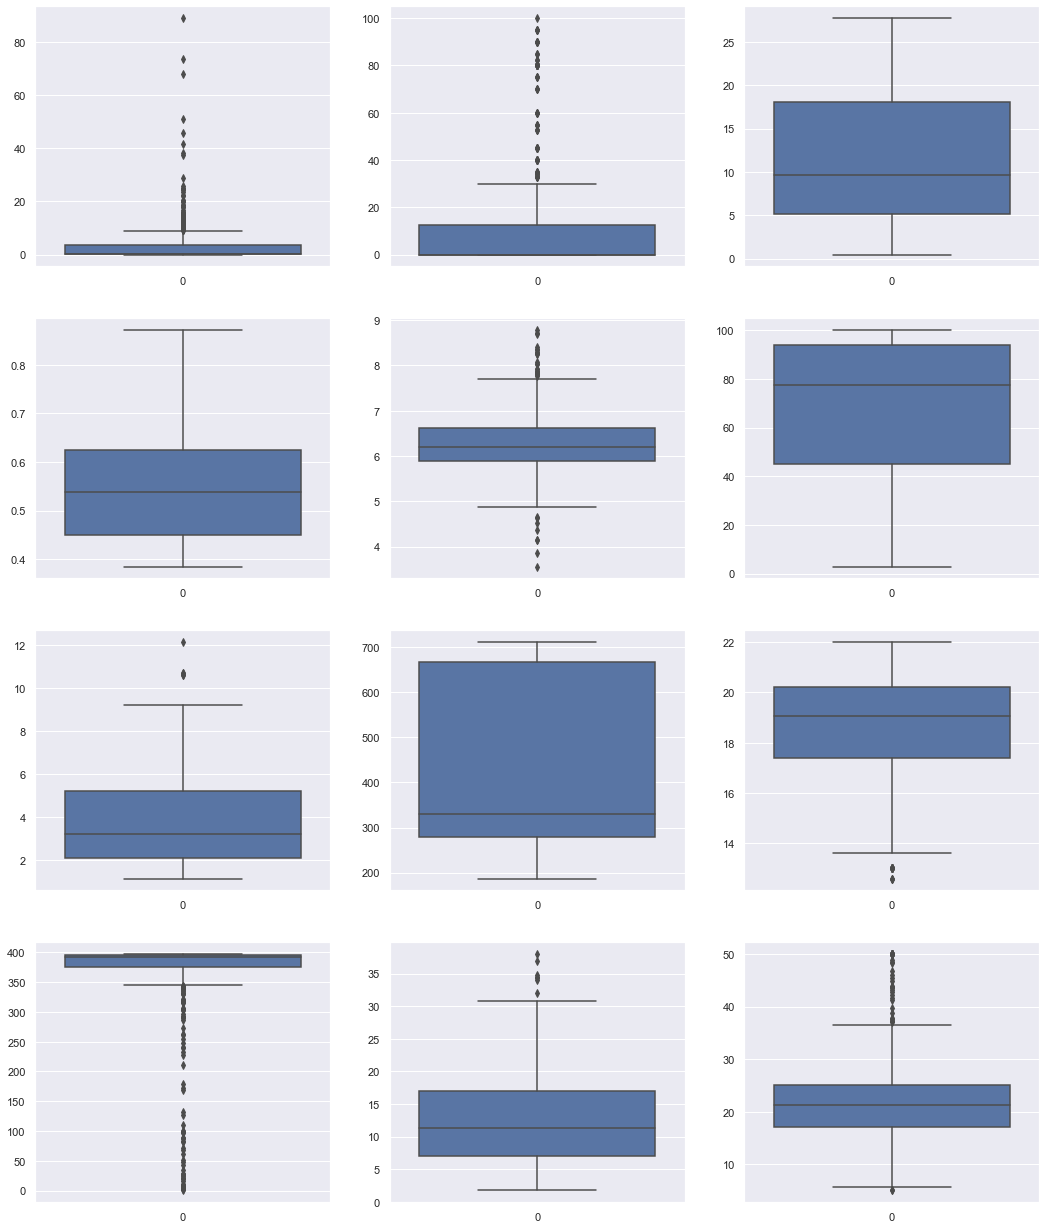

In [24]:
#Plotting boxplot for analysing the outliers
_,ax=plt.subplots(4,3,figsize=(18,22))
for i in range (len(numeric)):
    sns.boxplot(data=house[numeric[i]],ax=ax[i//3][i%3])

- **Outliers of transformed data**

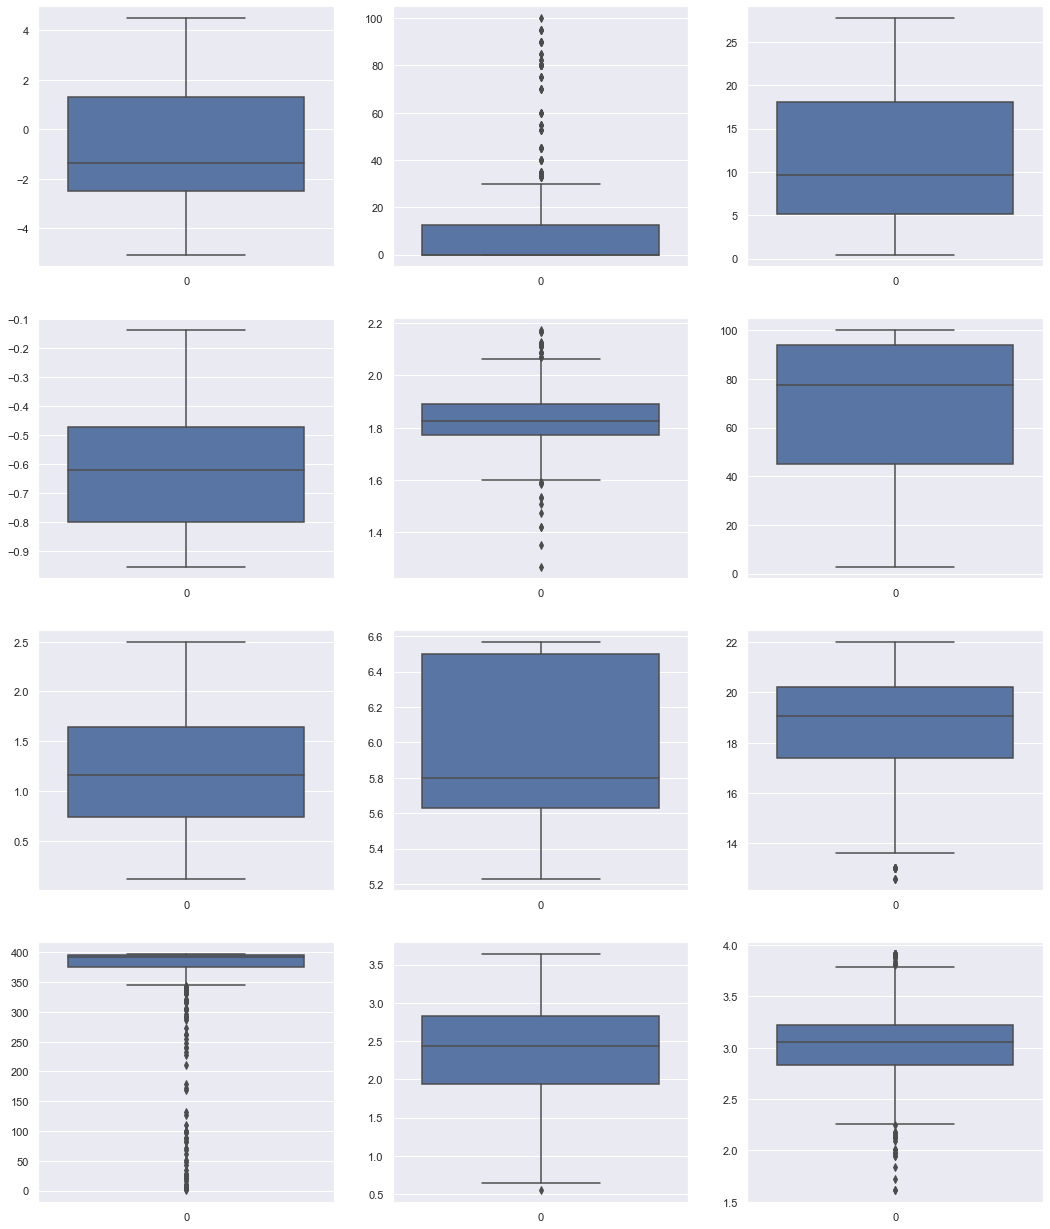

In [25]:
#Plotting boxplot for analysing the outliers
_,ax=plt.subplots(4,3,figsize=(18,22))
for i in range (len(numeric)):
    sns.boxplot(data=house1[numeric[i]],ax=ax[i//3][i%3])
    

**Conclusion:-**

As we can see the outliers are less in transformed data compared to untranformed data.

## Correlation

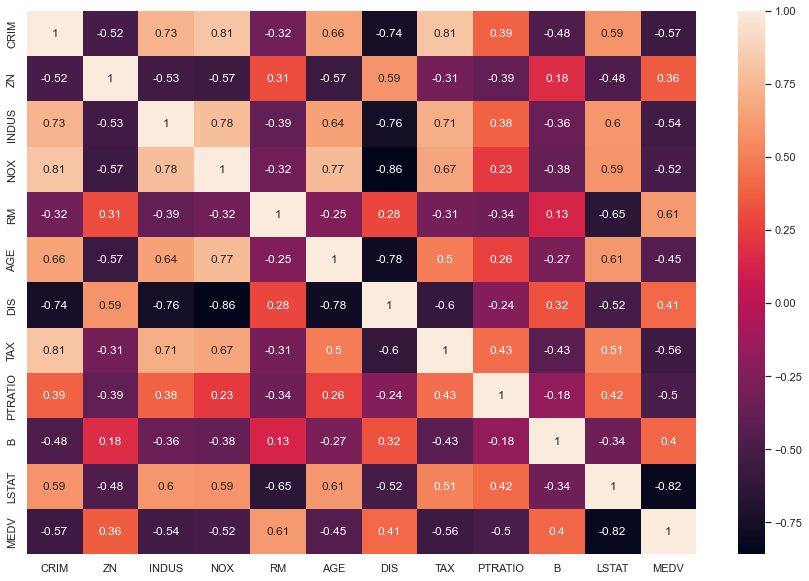

In [26]:
#Plotting heatmap to see the correlation 
corr = house1.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Distribution of numerical variables

- **Distribution of untransformed data**

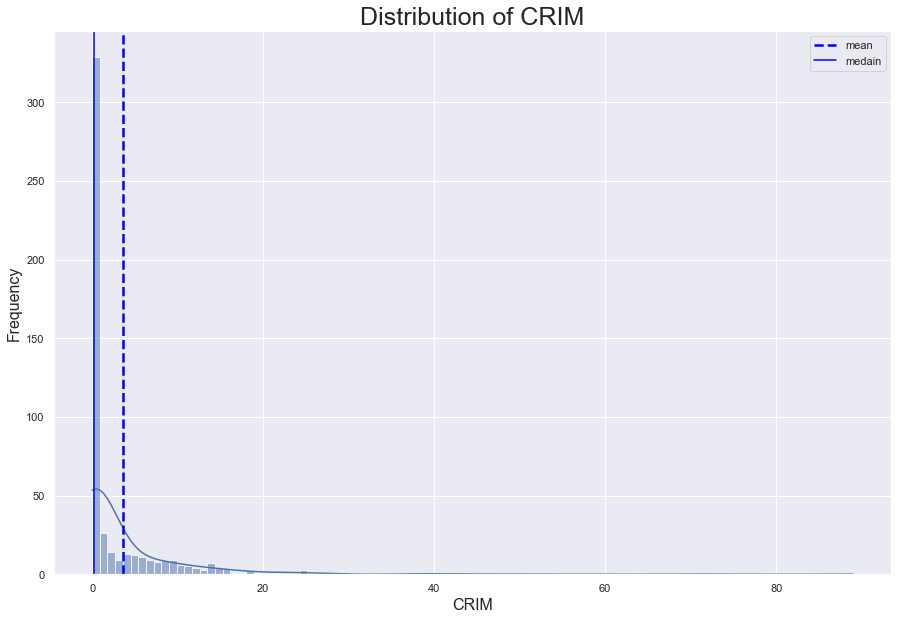

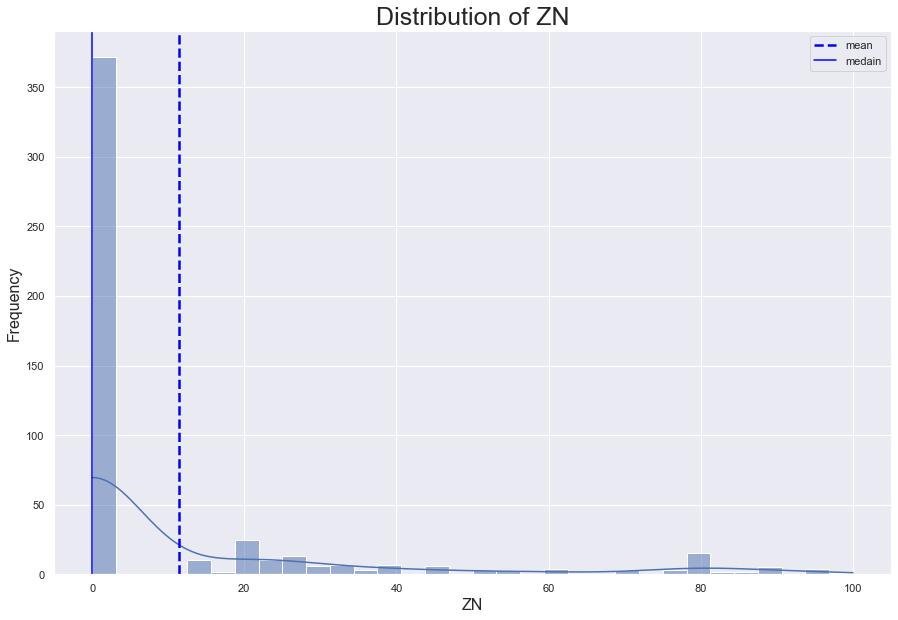

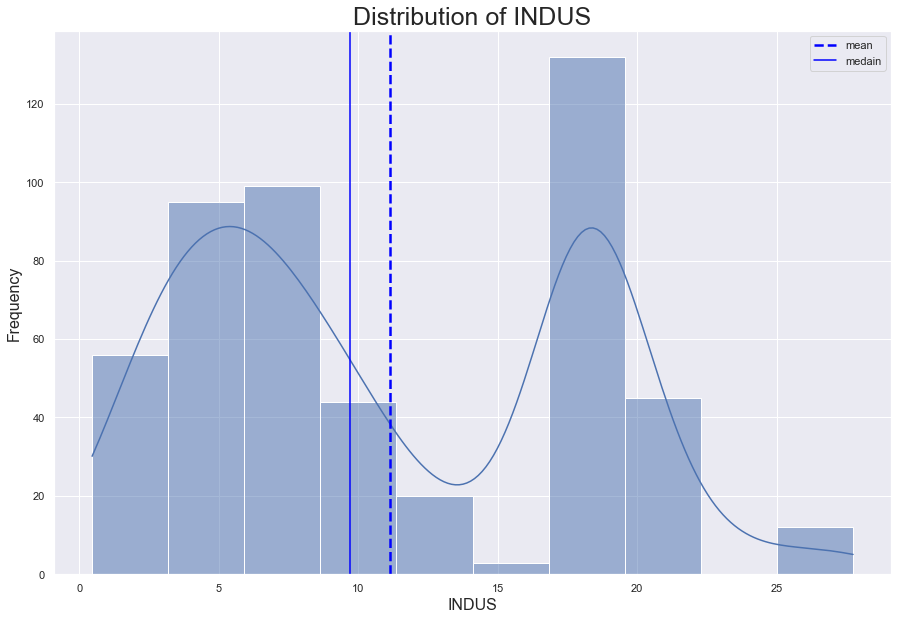

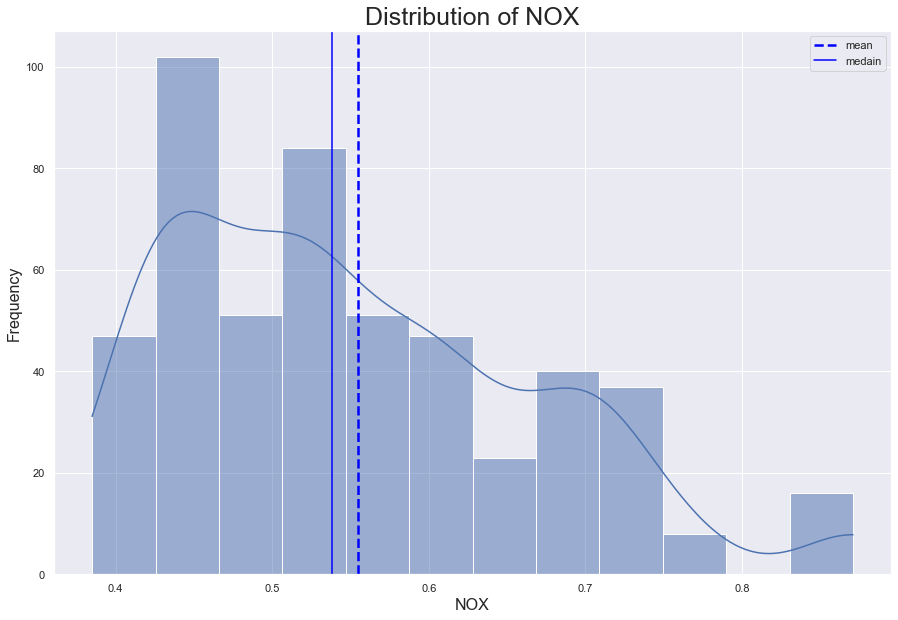

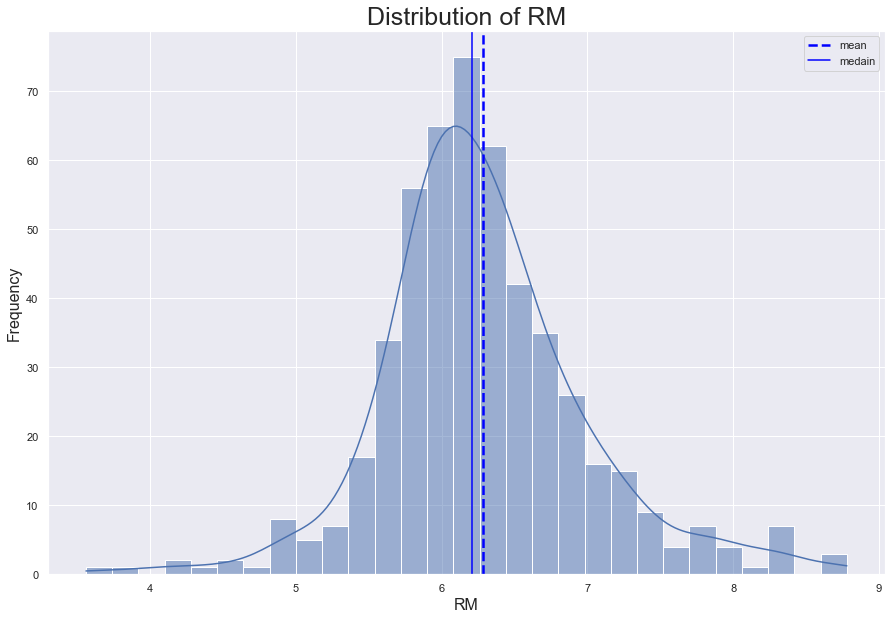

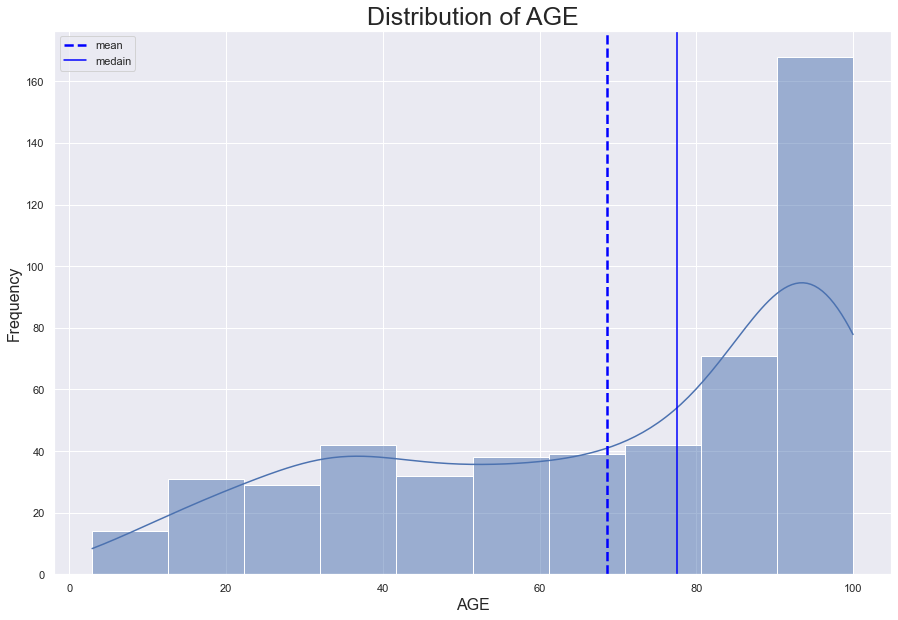

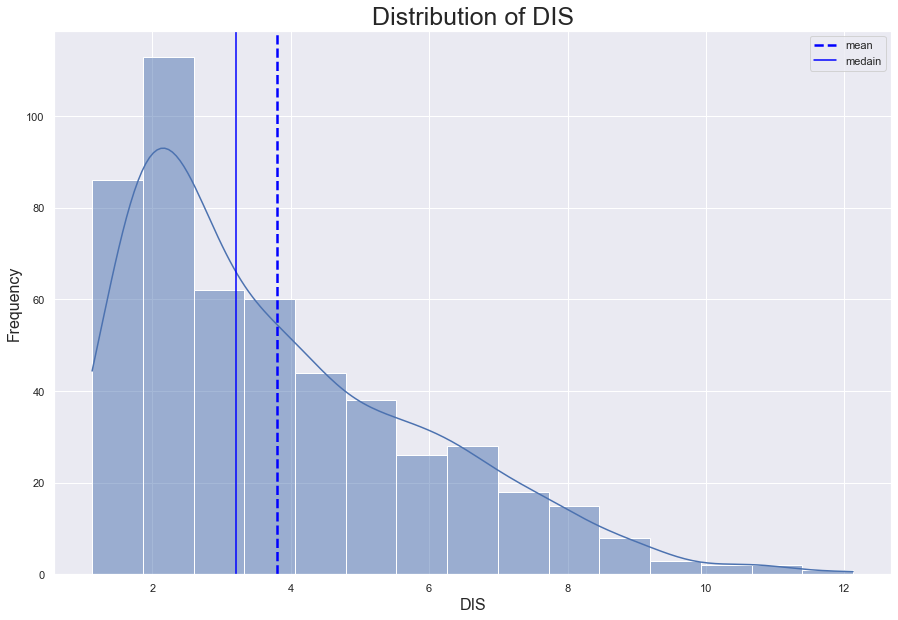

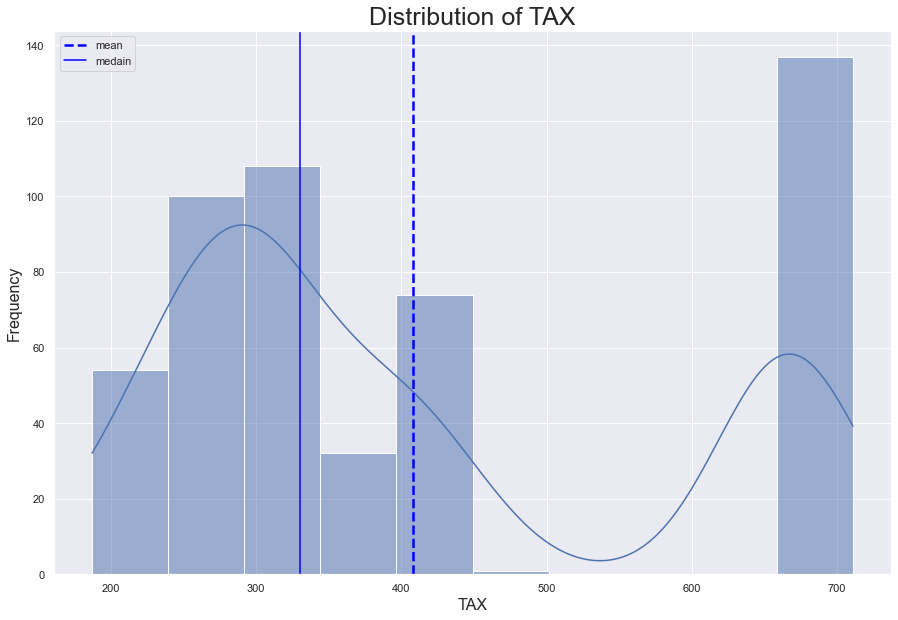

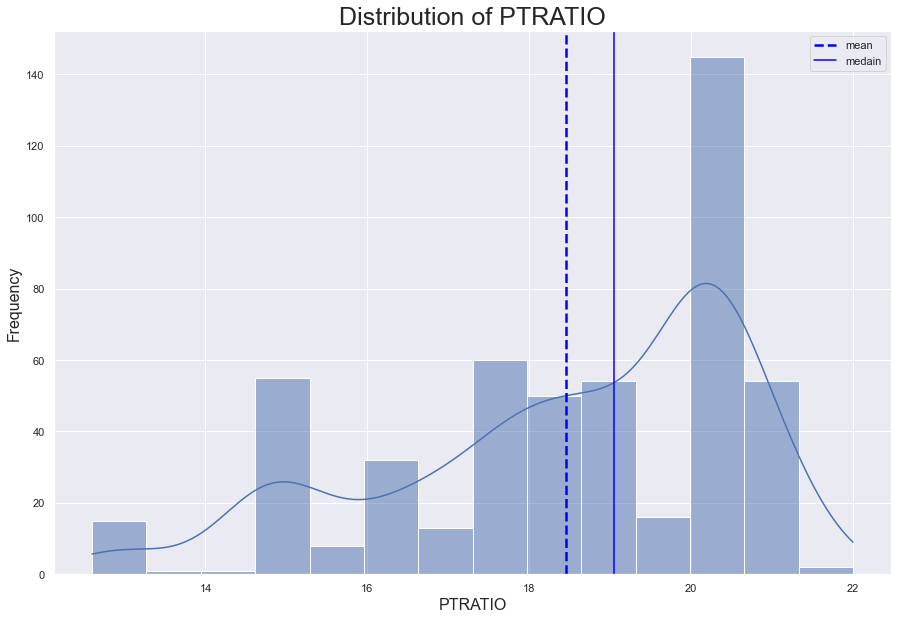

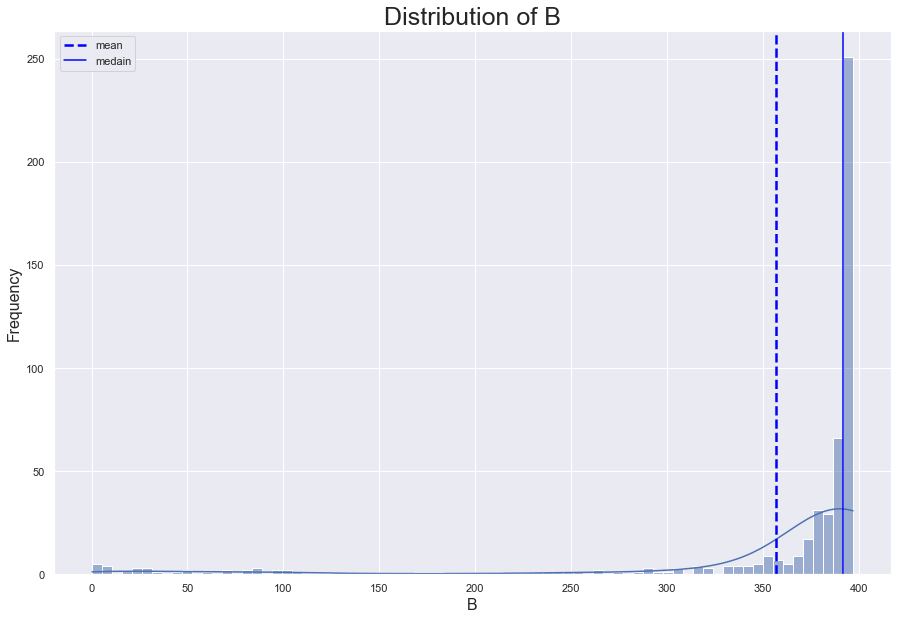

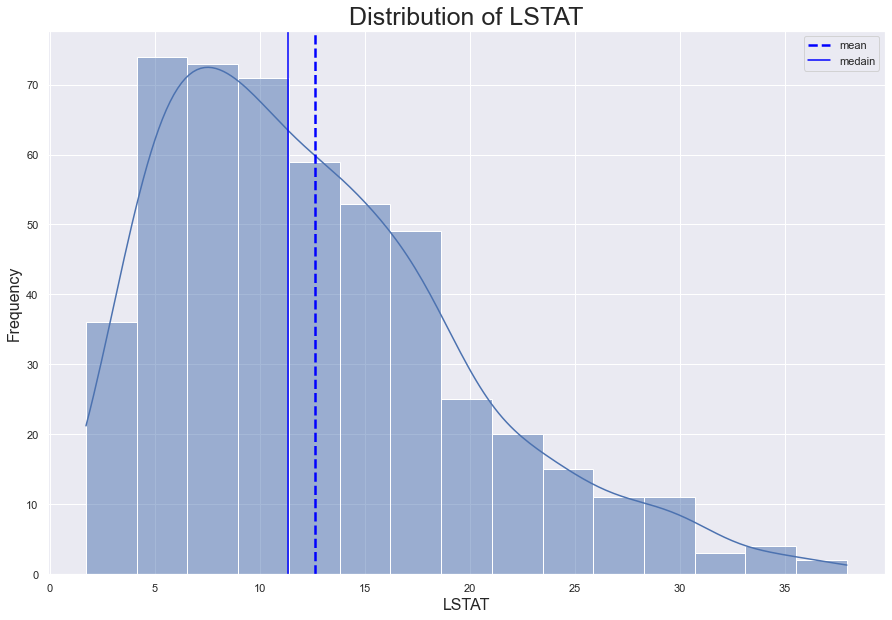

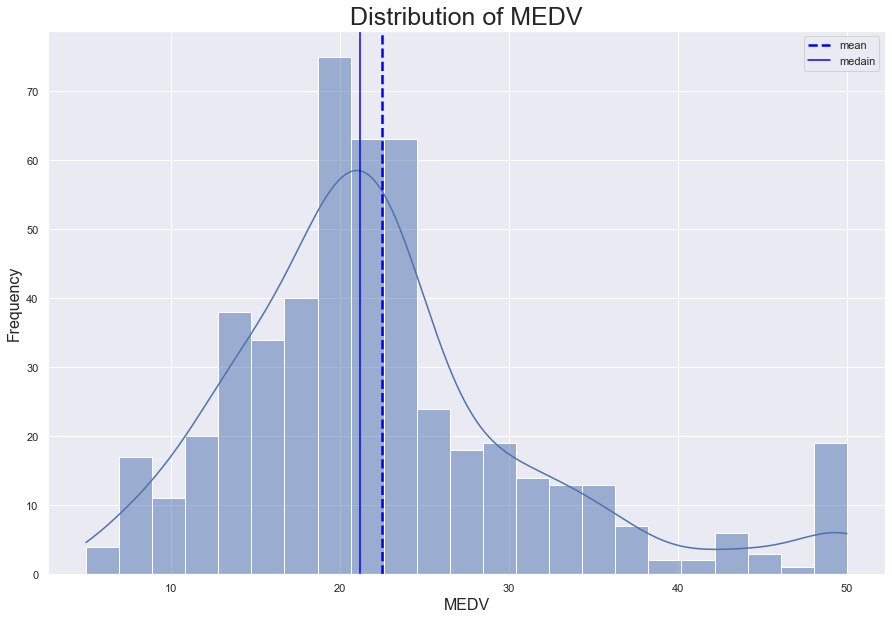

In [27]:
#Plotting histplot for analysing the distribution
for i in numeric:
    fig, ax = plt.subplots(1,1)
    sns.histplot(house[i],kde=True,edgecolor = 'white')
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.axvline(x=house[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=house[i].median(), color='blue',label='medain')
    plt.legend()
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

- **Distribution of transformed data**

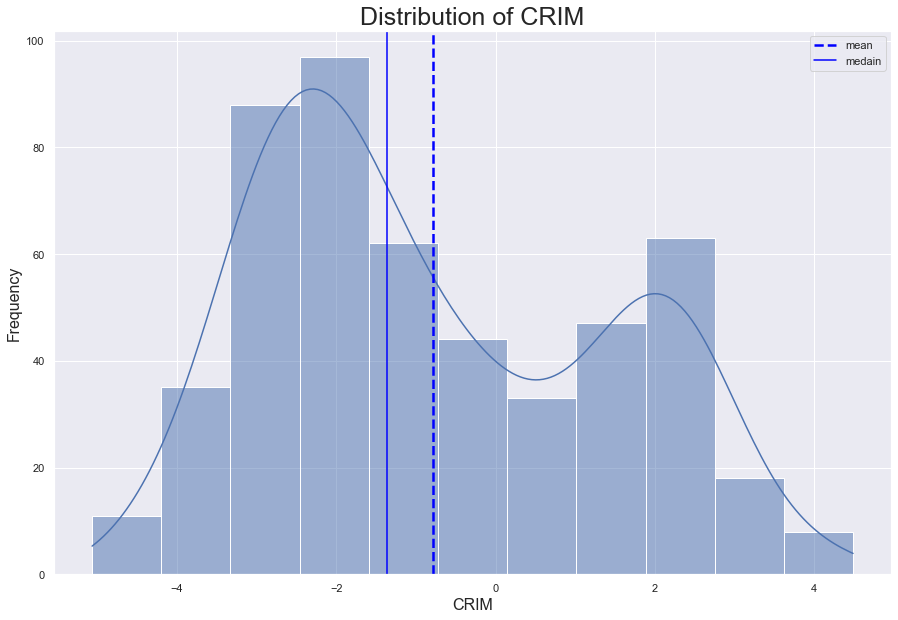

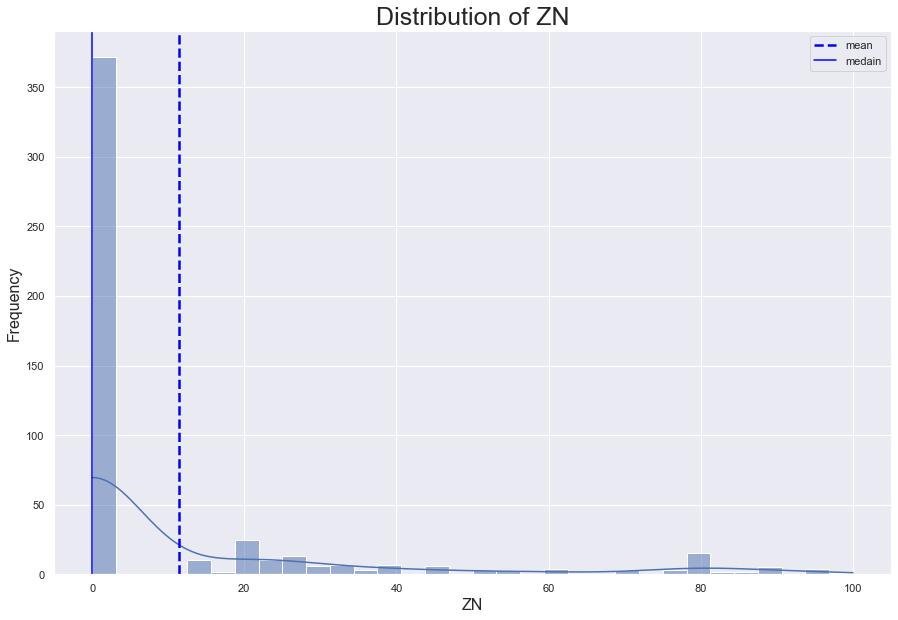

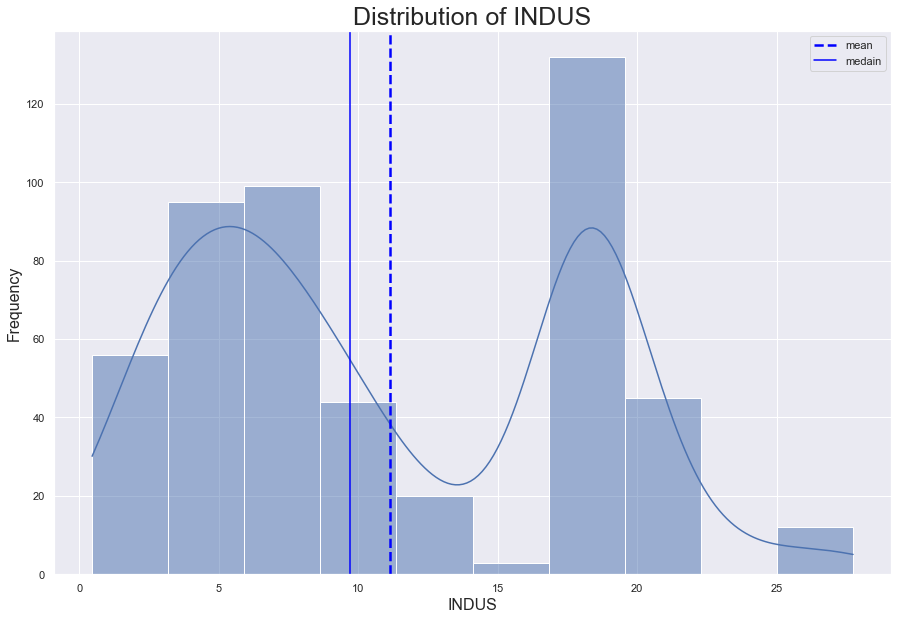

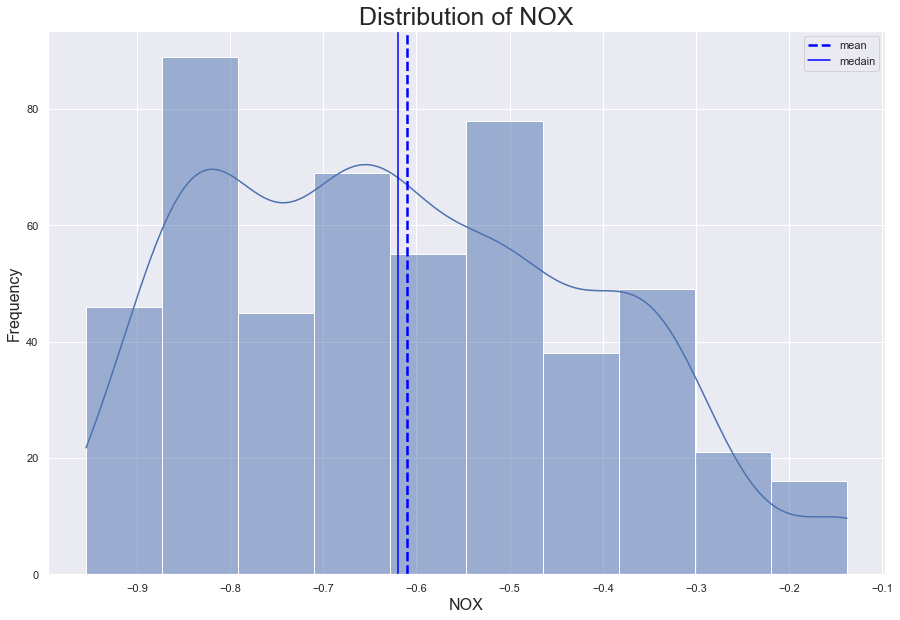

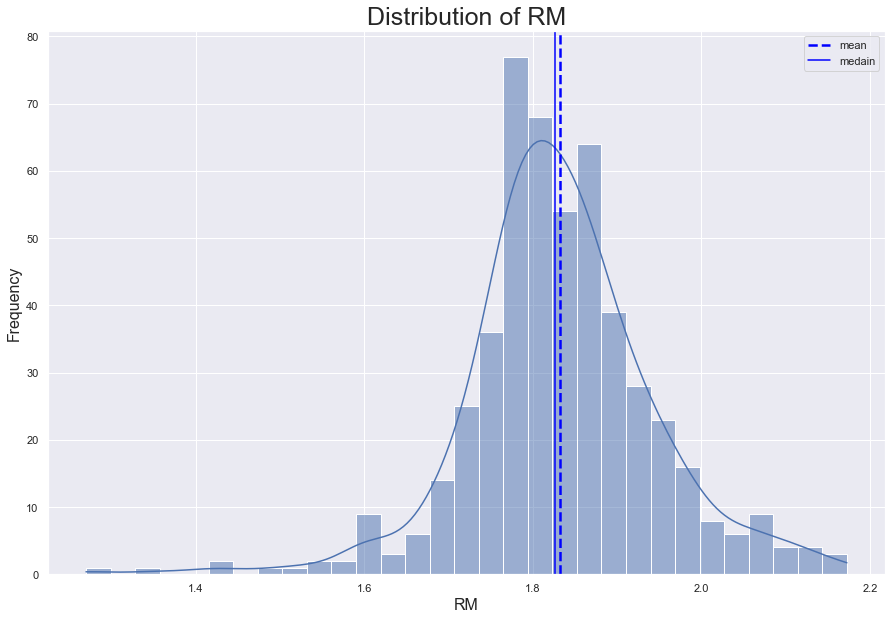

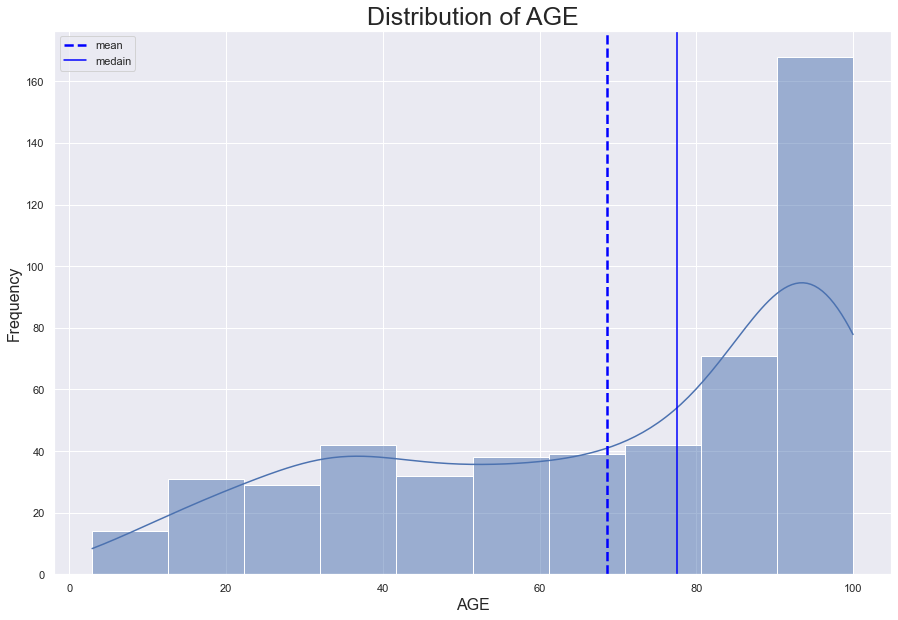

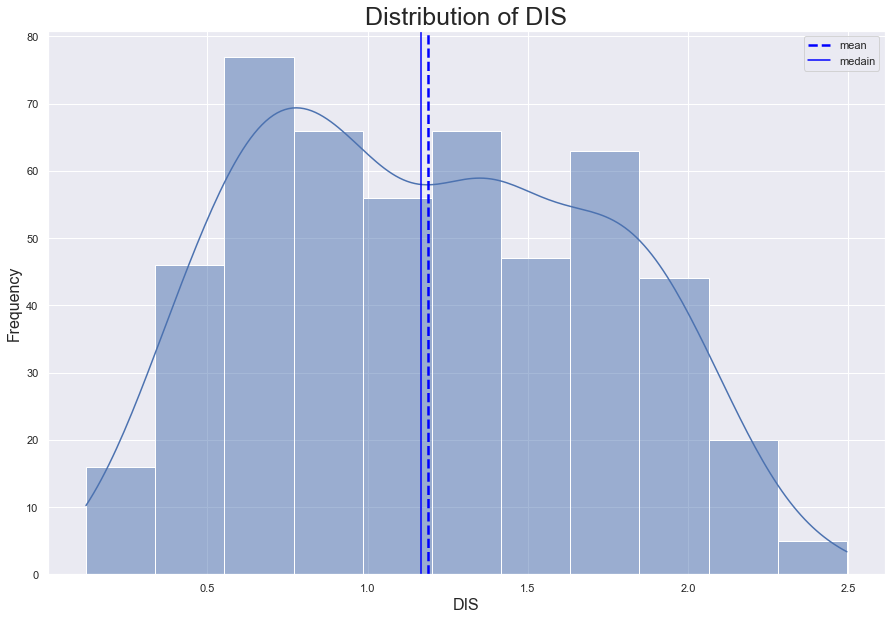

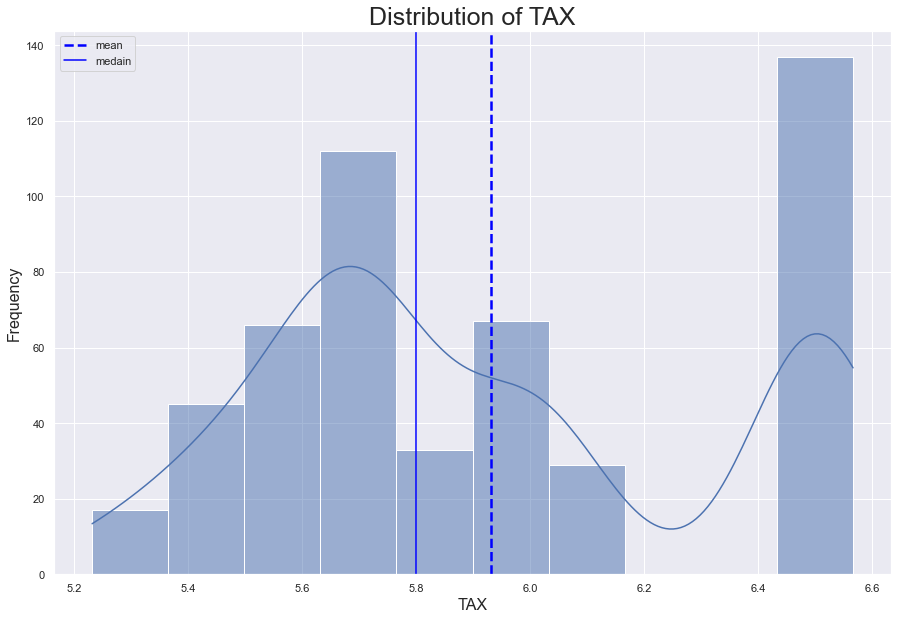

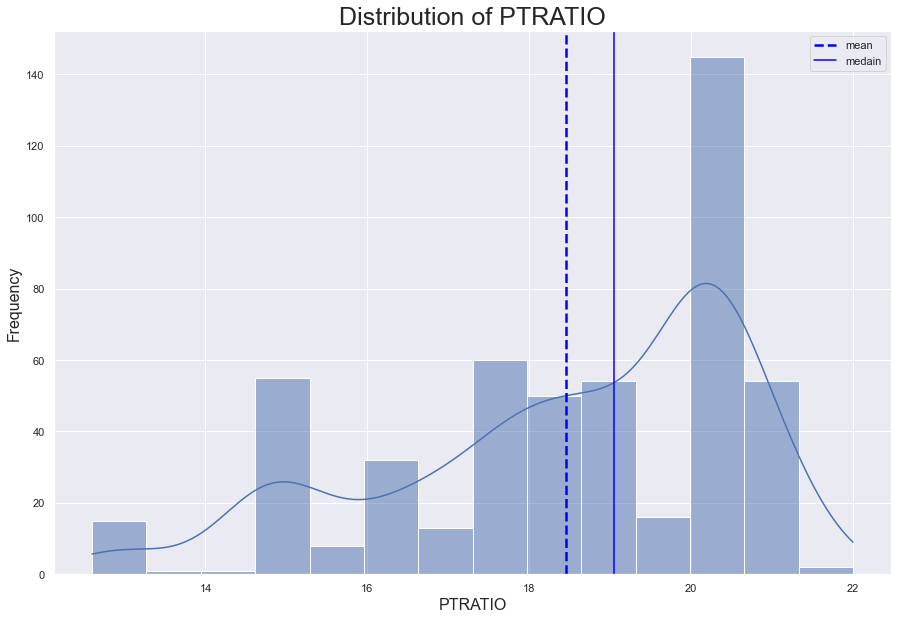

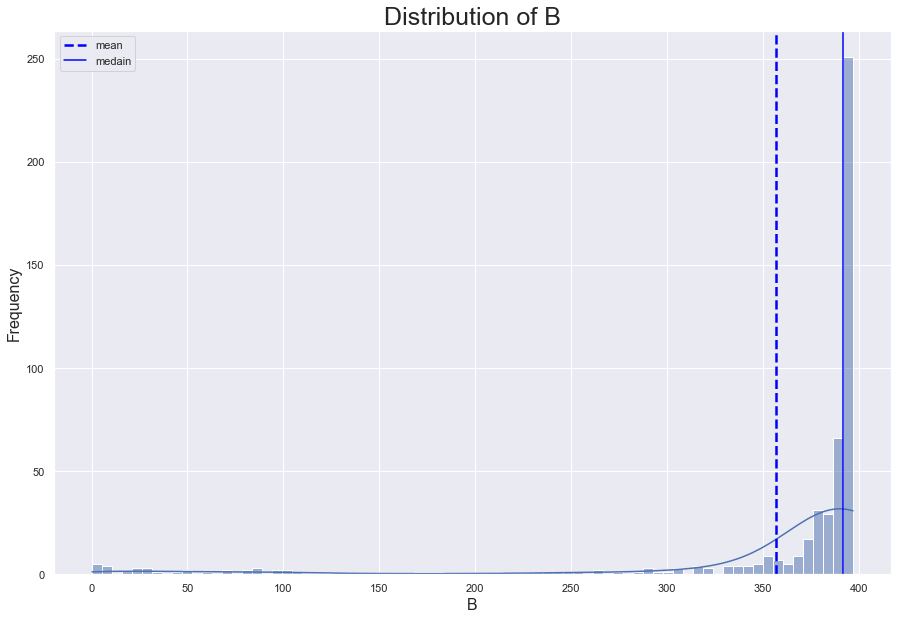

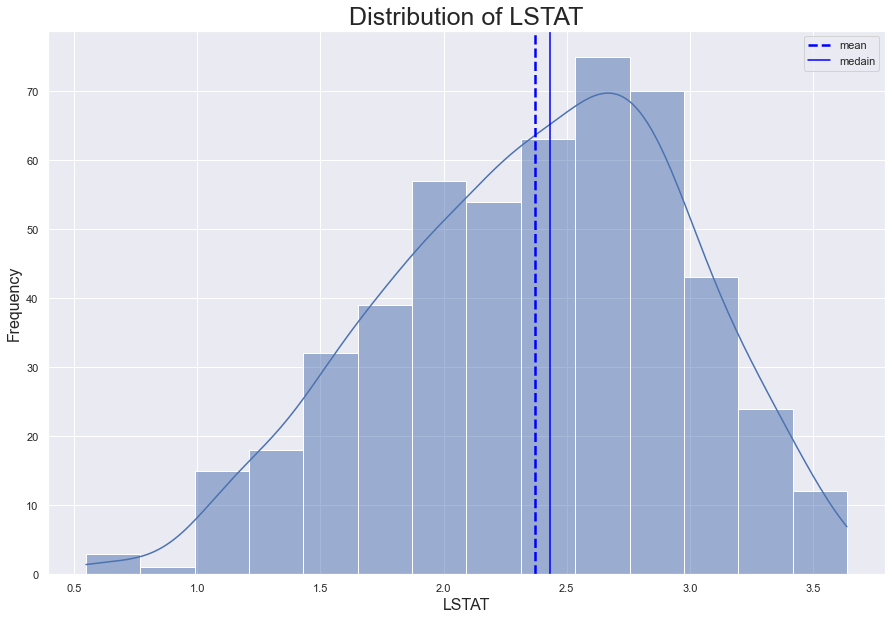

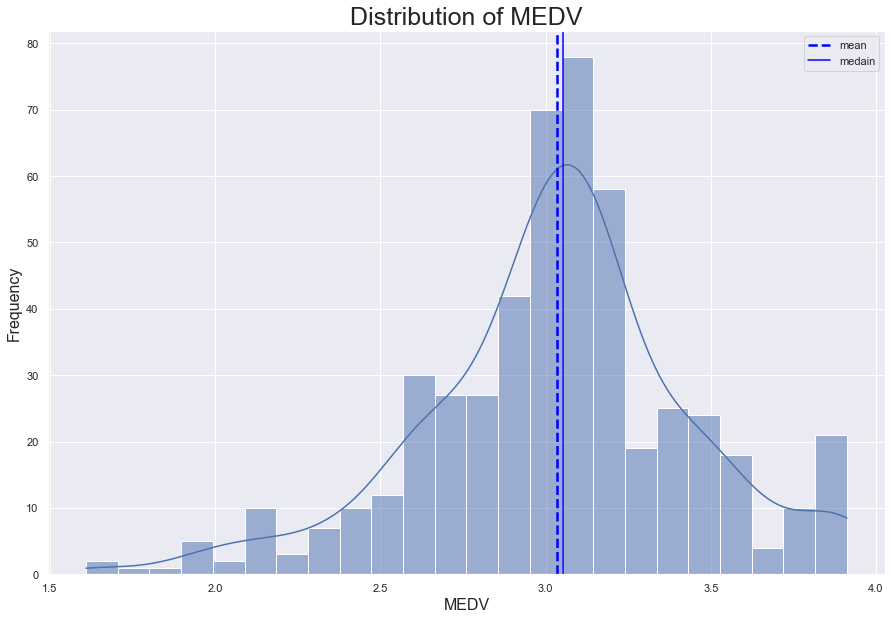

In [28]:
#Plotting histplot for analysing the distribution
for i in numeric:
    fig, ax = plt.subplots(1,1)
    sns.histplot(house1[i],kde=True,edgecolor = 'white')
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.axvline(x=house1[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=house1[i].median(), color='blue',label='medain')
    plt.legend()
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

**Conclusion:-**

As we can see transformed dataset is performing better than the untransformed dataset.

## Distribution of categorical variables

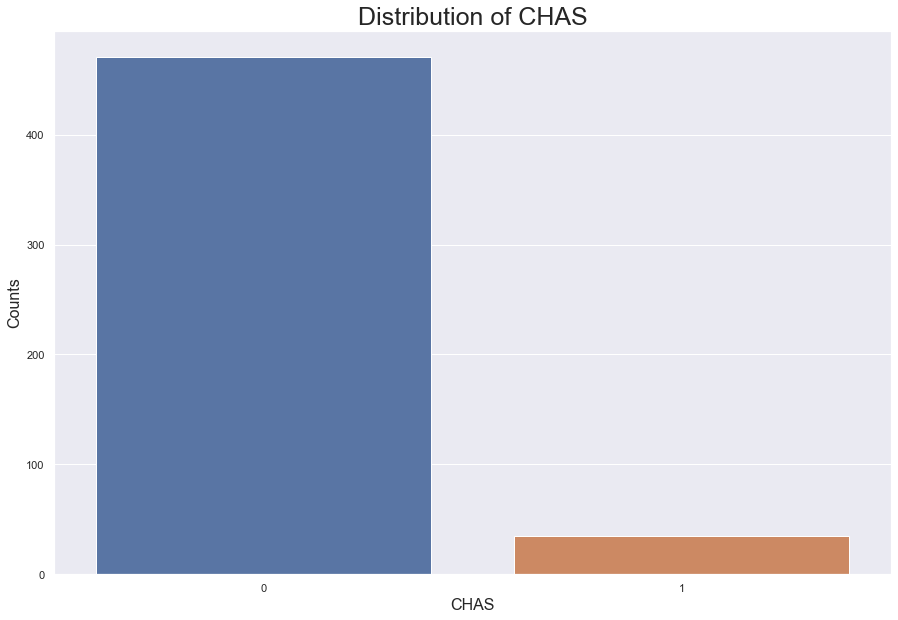

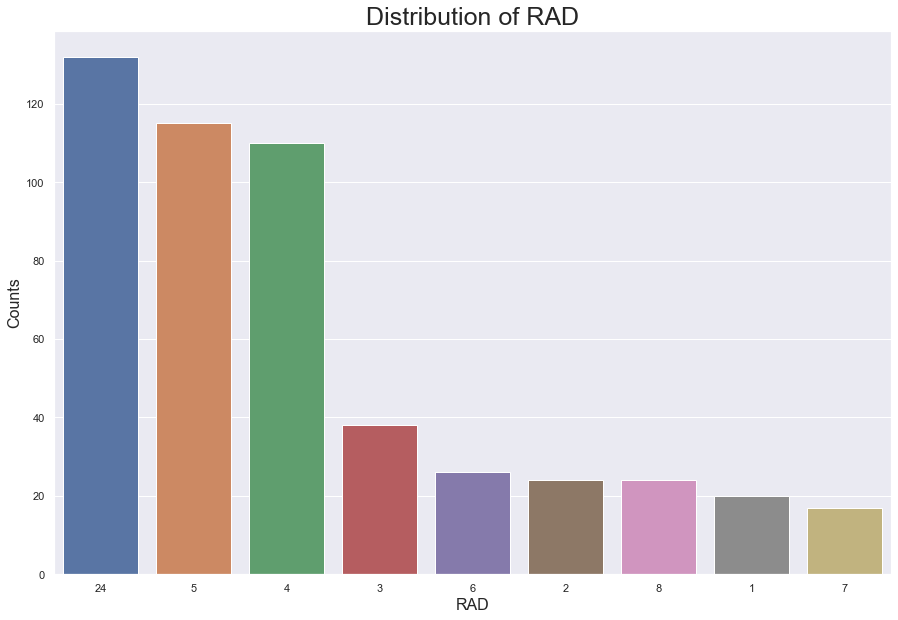

In [29]:
#Plotting countplot for analysing the distribution of categorical variables
for i in category:
    fig, ax = plt.subplots(1,1)
    sns.countplot(x=house1[i], order = house1[i].value_counts().index)
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Counts', fontsize=16)

## Numerical vs Categorical plots

Text(0, 0.5, 'CRIM')

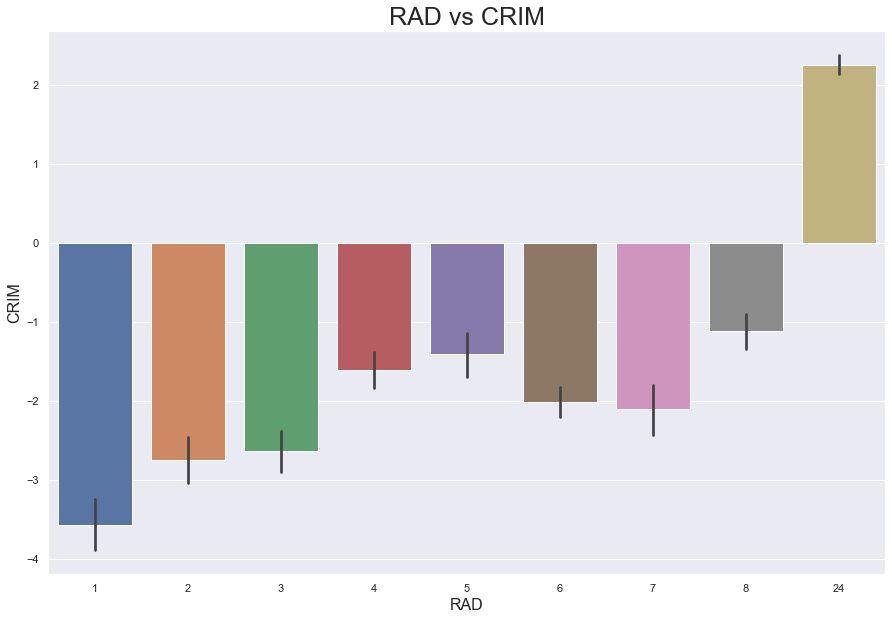

In [30]:
sns.barplot(x='RAD', y='CRIM',data=house1)
plt.title('RAD vs CRIM', fontsize=25)
plt.xlabel('RAD', fontsize=16)
plt.ylabel('CRIM', fontsize=16)

Text(0, 0.5, 'LSTAT')

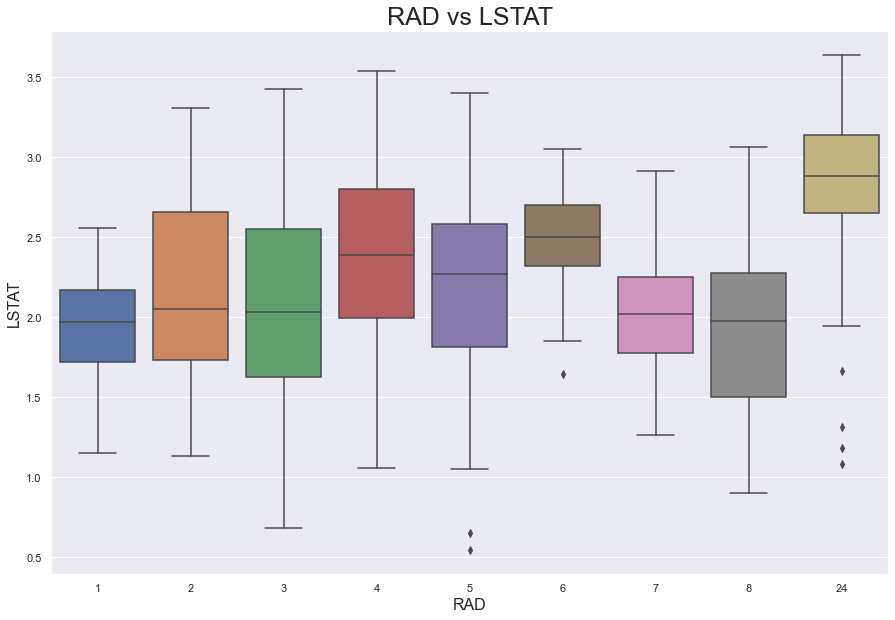

In [31]:
sns.boxplot(x='RAD', y='LSTAT',data=house1)
plt.title('RAD vs LSTAT', fontsize=25)
plt.xlabel('RAD', fontsize=16)
plt.ylabel('LSTAT', fontsize=16)

Text(0, 0.5, 'INDUS')

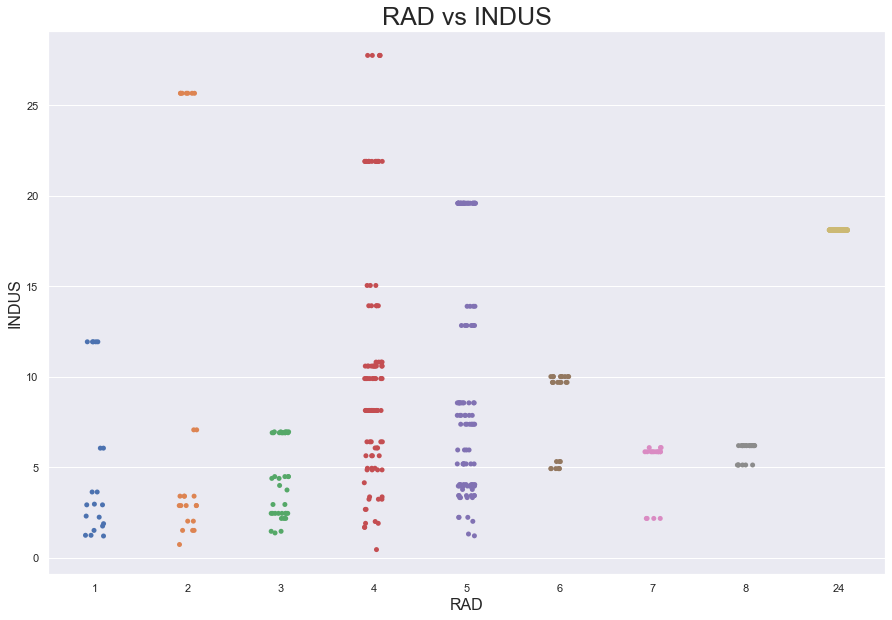

In [32]:
sns.stripplot(x='RAD', y='INDUS',data=house1)
plt.title('RAD vs INDUS', fontsize=25)
plt.xlabel('RAD', fontsize=16)
plt.ylabel('INDUS', fontsize=16)

Text(0, 0.5, 'ZN')

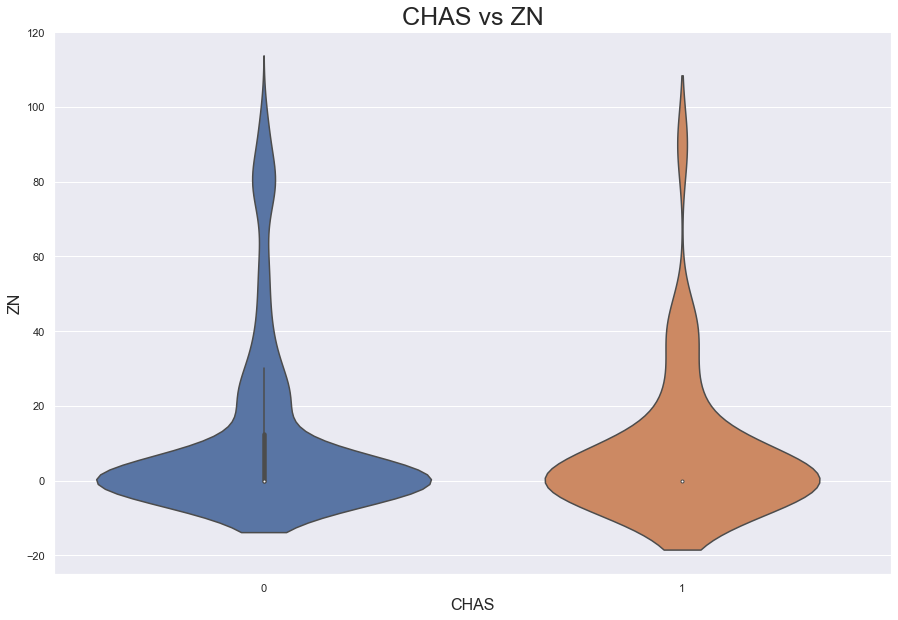

In [33]:
sns.violinplot(x='CHAS', y='ZN',data=house1)
plt.title('CHAS vs ZN', fontsize=25)
plt.xlabel('CHAS', fontsize=16)
plt.ylabel('ZN', fontsize=16)

Text(0, 0.5, 'PTRATIO')

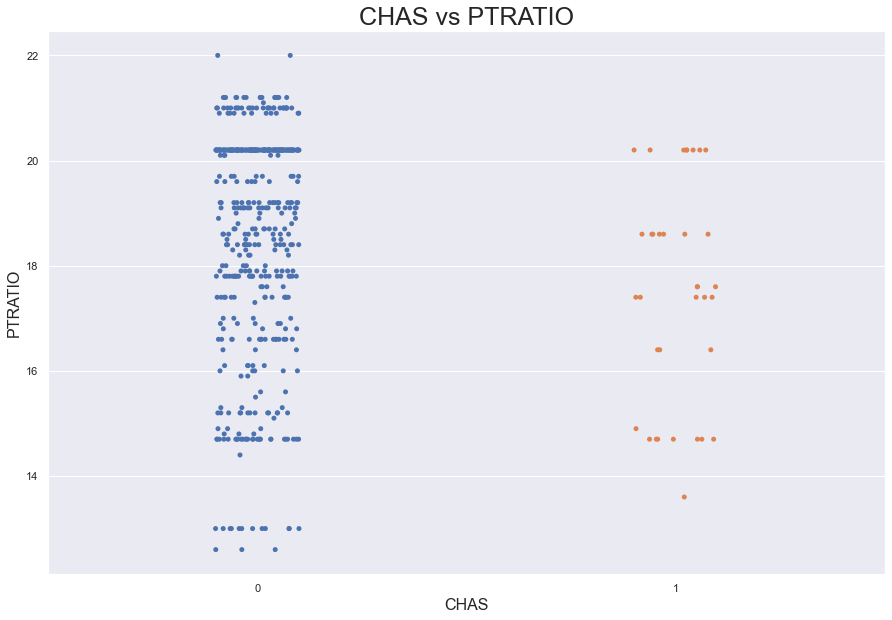

In [34]:
sns.stripplot(x='CHAS', y='PTRATIO',data=house1)
plt.title('CHAS vs PTRATIO', fontsize=25)
plt.xlabel('CHAS', fontsize=16)
plt.ylabel('PTRATIO', fontsize=16)

Text(0, 0.5, 'CRIM')

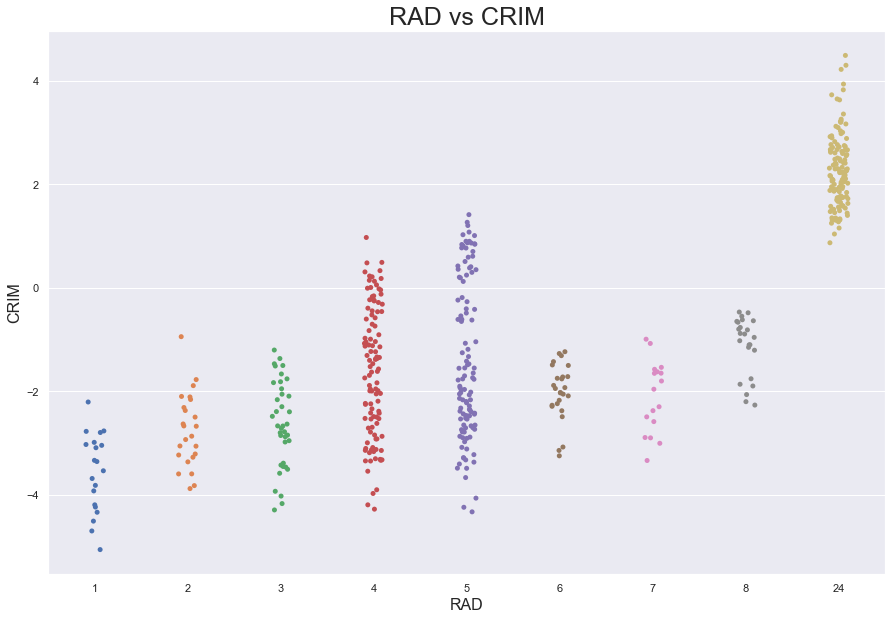

In [35]:
sns.stripplot(x='RAD', y='CRIM',data=house1)
plt.title('RAD vs CRIM', fontsize=25)
plt.xlabel('RAD', fontsize=16)
plt.ylabel('CRIM', fontsize=16)

Text(0, 0.5, 'CRIM')

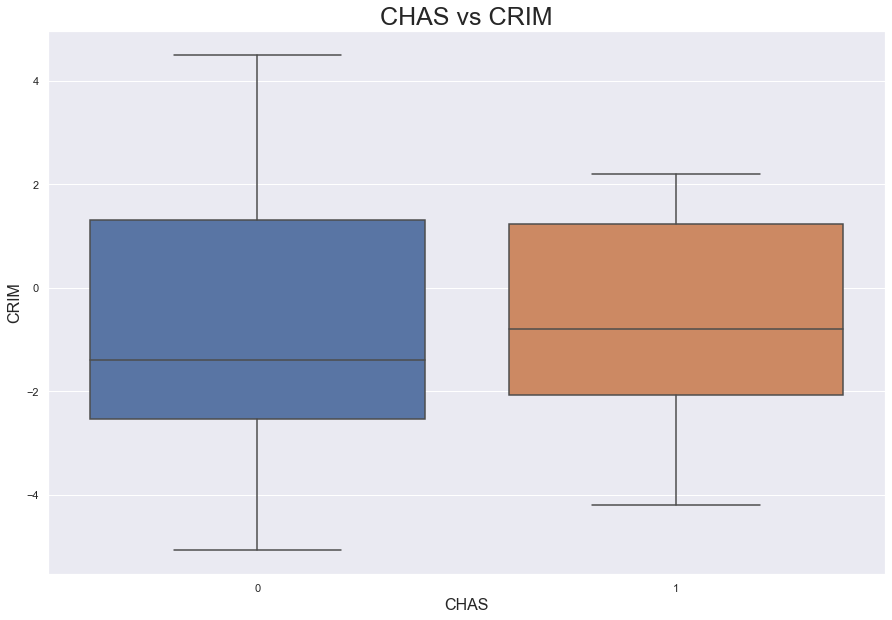

In [36]:
sns.boxplot(x='CHAS', y='CRIM', data=house1)
plt.title('CHAS vs CRIM', fontsize=25)
plt.xlabel('CHAS', fontsize=16)
plt.ylabel('CRIM', fontsize=16)

Text(0, 0.5, 'RM')

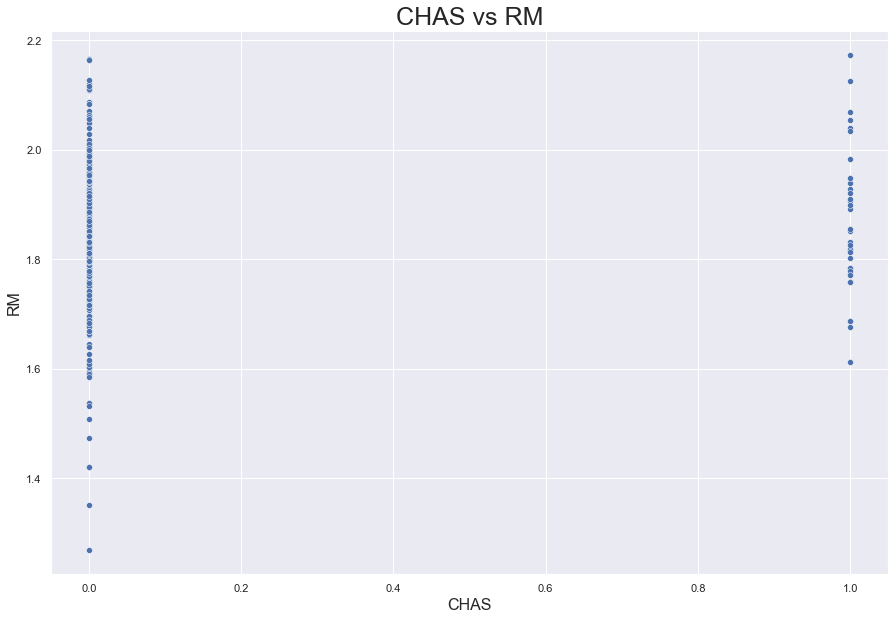

In [37]:
sns.scatterplot(x='CHAS', y='RM',data=house1)
plt.title('CHAS vs RM', fontsize=25)
plt.xlabel('CHAS', fontsize=16)
plt.ylabel('RM', fontsize=16)

Text(0, 0.5, 'AGE')

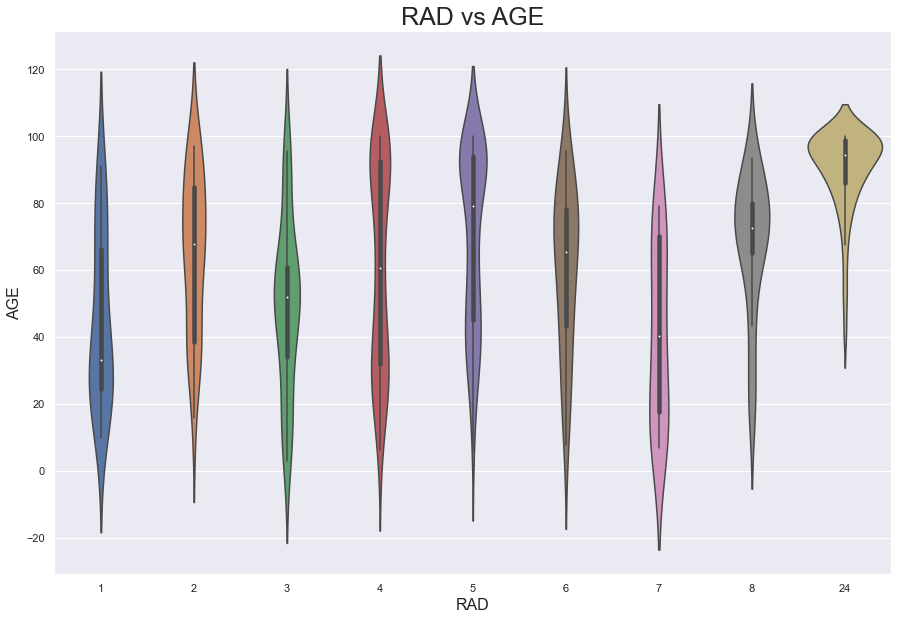

In [38]:
sns.violinplot(x='RAD', y='AGE',data=house1)
plt.title('RAD vs AGE', fontsize=25)
plt.xlabel('RAD', fontsize=16)
plt.ylabel('AGE', fontsize=16)

Text(0, 0.5, 'NOX')

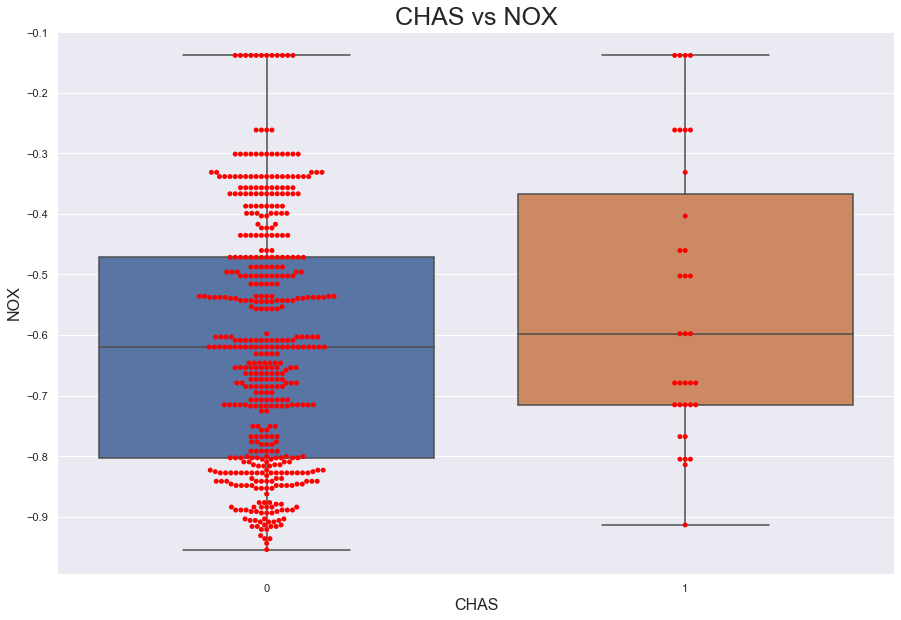

In [39]:
sns.swarmplot(x='CHAS', y='NOX',data=house1, color='red')
sns.boxplot(x='CHAS', y='NOX',data=house1)
plt.title('CHAS vs NOX', fontsize=25)
plt.xlabel('CHAS', fontsize=16)
plt.ylabel('NOX', fontsize=16)

## Numerical vs Numerical plots

Text(0, 0.5, 'LSTAT')

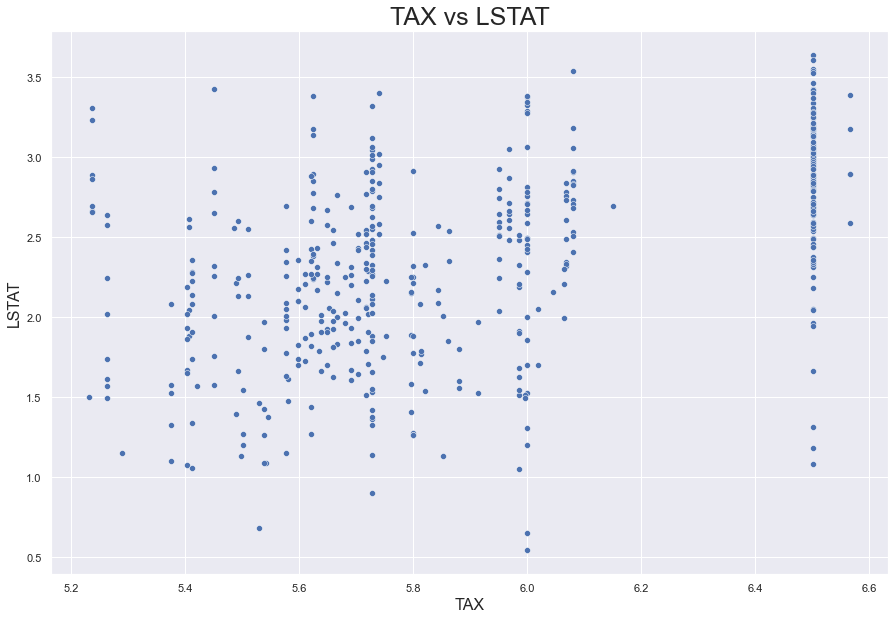

In [40]:
sns.scatterplot(x='TAX', y='LSTAT',data=house1)
plt.title('TAX vs LSTAT', fontsize=25)
plt.xlabel('TAX', fontsize=16)
plt.ylabel('LSTAT', fontsize=16)

Text(0, 0.5, 'MEDV')

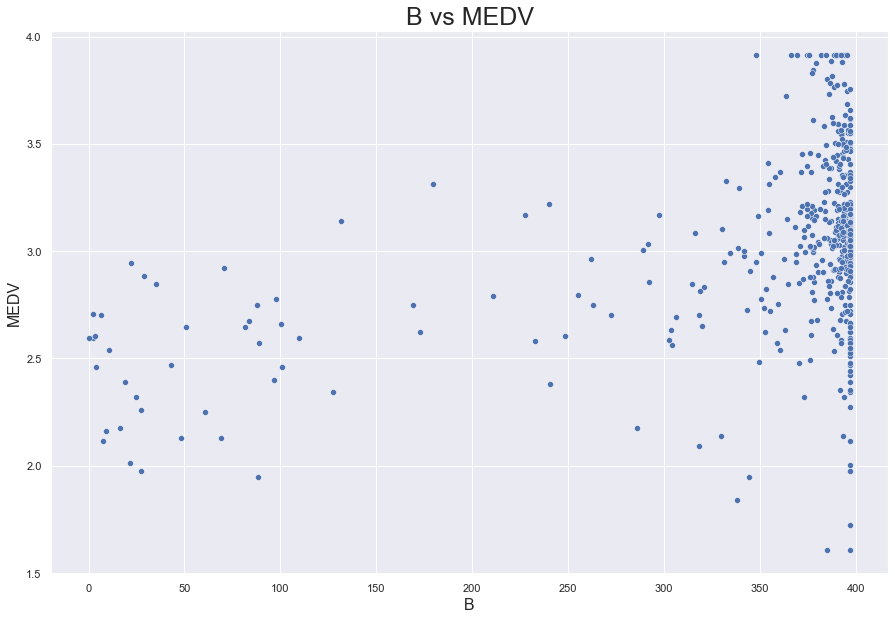

In [41]:
sns.scatterplot(x='B', y='MEDV',data=house1)
plt.title('B vs MEDV', fontsize=25)
plt.xlabel('B', fontsize=16)
plt.ylabel('MEDV', fontsize=16)

Text(0, 0.5, 'PTRATIO')

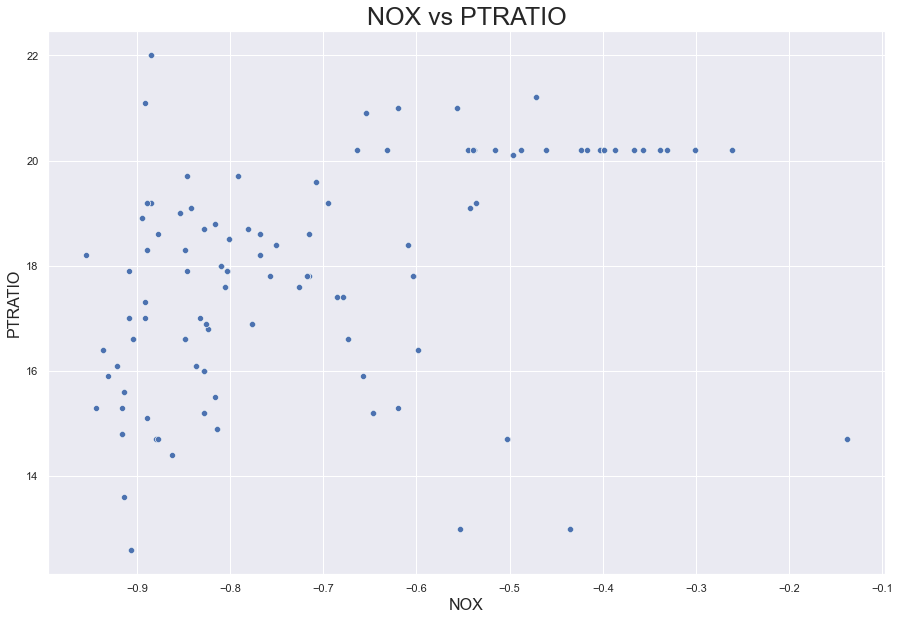

In [42]:
sns.scatterplot(x='NOX', y='PTRATIO',data=house1)
plt.title('NOX vs PTRATIO', fontsize=25)
plt.xlabel('NOX', fontsize=16)
plt.ylabel('PTRATIO', fontsize=16)

Text(0, 0.5, 'CRIM')

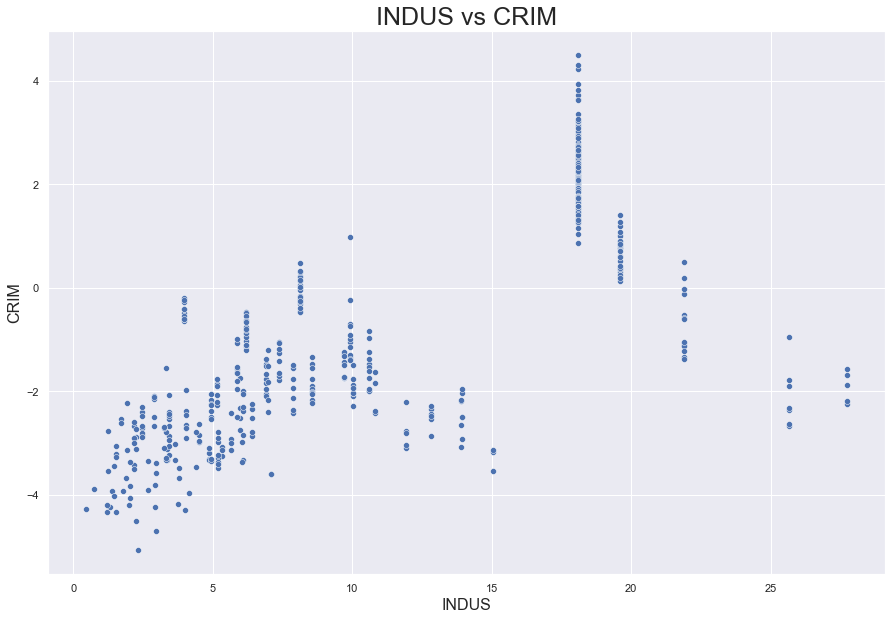

In [43]:
sns.scatterplot(x='INDUS', y='CRIM',data=house1)
plt.title('INDUS vs CRIM', fontsize=25)
plt.xlabel('INDUS', fontsize=16)
plt.ylabel('CRIM', fontsize=16)

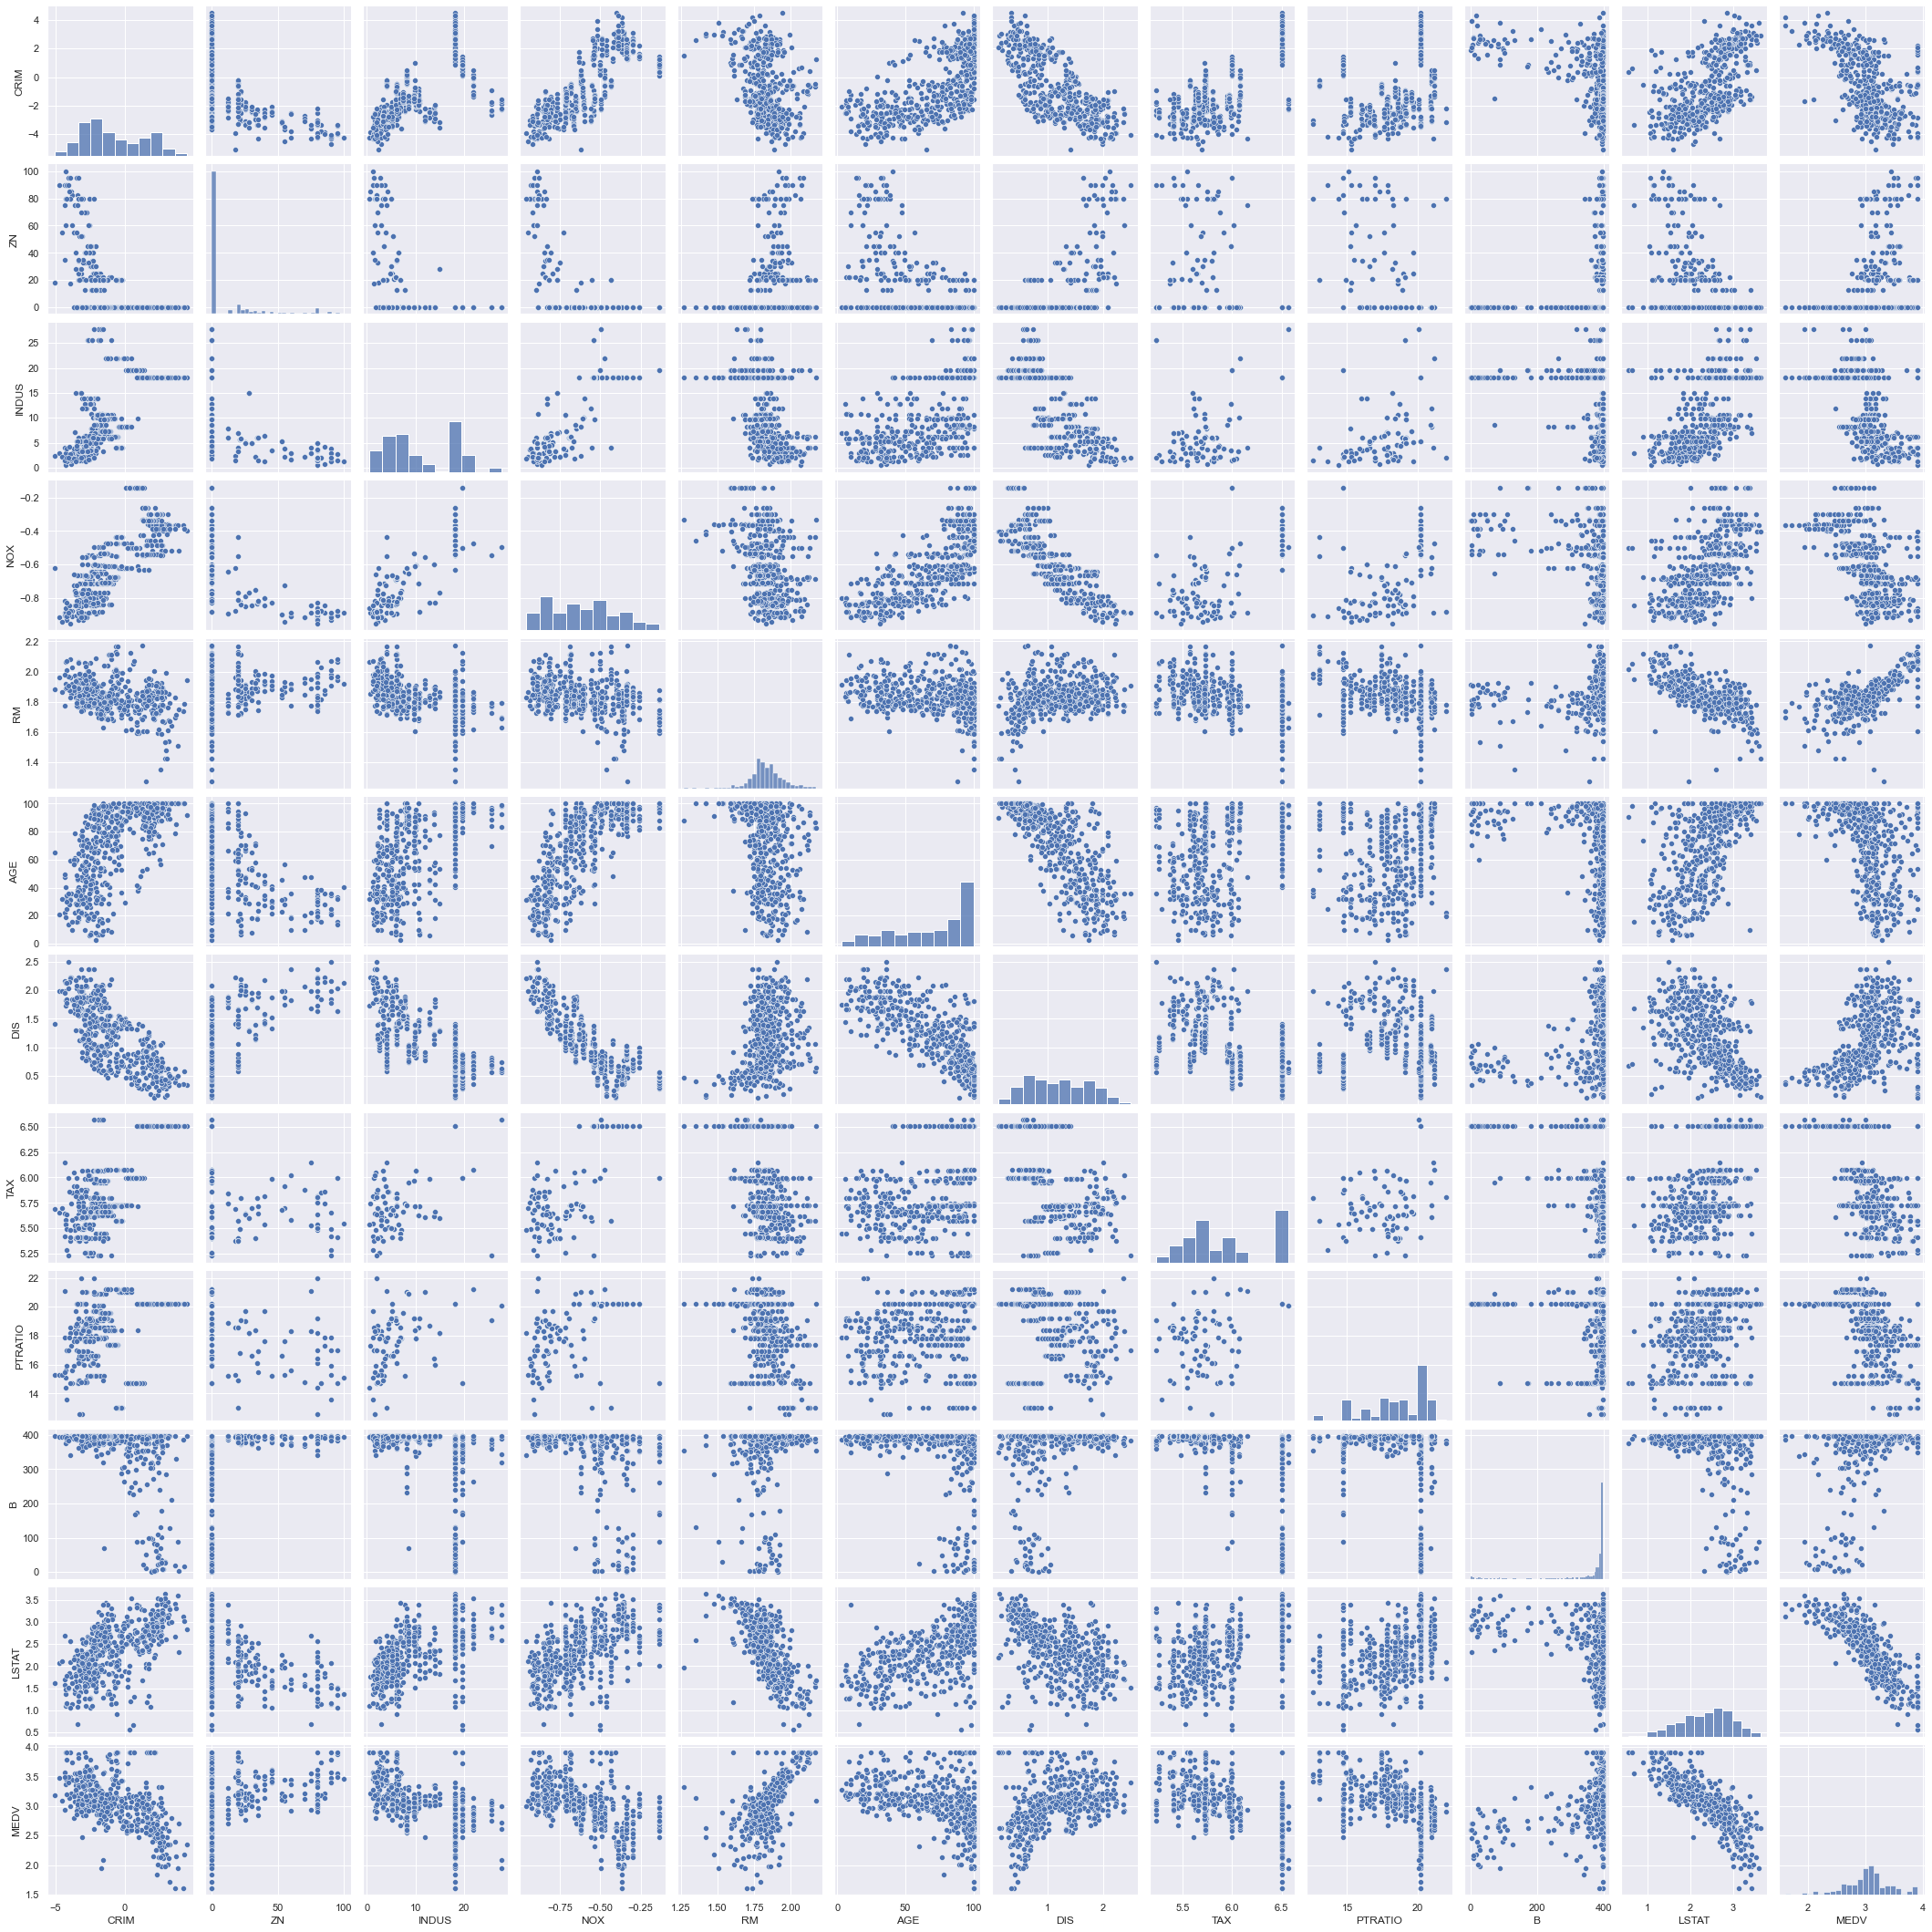

In [44]:
sns.pairplot(house1)